# Outcomes after Thoracic Surgery for Patients with Lung Cancer
## Capstone 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
import re
import seaborn as sns
from IPython.display import display, HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from xgboost import (XGBClassifier, plot_importance, DMatrix)
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import xgboost
from sklearn.neighbors import KNeighborsClassifier



In [4]:
thoracic_df = pd.read_csv('./thoracicsurgery.txt', sep=",", header=None)
#thoracic_df.columns = ['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14,' 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Y']

thoracic_df.columns = ['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 
                       'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking', 'Asthma', 'Age', 'Risk1Y']

In [5]:
thoracic_df.head(15)

DGN   FVC  FEV1 Zubrod Pain Haemoptysis Dyspnea Cough Weakness  \
0   DGN2  2.88  2.16   PRZ1    F           F       F     T        T   
1   DGN3  3.40  1.88   PRZ0    F           F       F     F        F   
2   DGN3  2.76  2.08   PRZ1    F           F       F     T        F   
3   DGN3  3.68  3.04   PRZ0    F           F       F     F        F   
4   DGN3  2.44  0.96   PRZ2    F           T       F     T        T   
5   DGN3  2.48  1.88   PRZ1    F           F       F     T        F   
6   DGN3  4.36  3.28   PRZ1    F           F       F     T        F   
7   DGN2  3.19  2.50   PRZ1    F           F       F     T        F   
8   DGN3  3.16  2.64   PRZ2    F           F       F     T        T   
9   DGN3  2.32  2.16   PRZ1    F           F       F     T        F   
10  DGN3  2.56  2.32   PRZ0    F           T       F     T        F   
11  DGN3  4.28  4.44   PRZ1    F           F       F     F        F   
12  DGN3  3.00  2.36   PRZ1    F           F       F     T        T   
13  DGN2  3.98  3.06   PRZ2    F           F       F     T        T   
14  DGN3  1.96  1.40   PRZ1    F           F       F     T        F   

   Tumor_size T2DM MI PAD Smoking Asthma  Age Risk1Y  
0        OC14    F  F   F       T      F   60      F  
1        OC12    F  F   F       T      F   51      F  
2        OC11    F  F   F       T      F   59      F  
3        OC11    F  F   F       F      F   54      F  
4        OC11    F  F   F       T      F   73      T  
5        OC11    F  F   F       F      F   51      F  
6        OC12    T  F   F       T      F   59      T  
7        OC11    F  F   T       T      F   66      T  
8        OC11    F  F   F       T      F   68      F  
9        OC11    F  F   F       T      F   54      F  
10       OC12    F  F   F       F      F   60      F  
11       OC12    F  F   F       T      F   58      F  
12       OC11    F  F   F       T      F   68      F  
13       OC14    F  F   F       T      F   80      T  
14       OC11    F  F   F       T      F   77      F

In [4]:
thoracic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
DGN            470 non-null object
FVC            470 non-null float64
FEV1           470 non-null float64
Zubrod         470 non-null object
Pain           470 non-null object
Haemoptysis    470 non-null object
Dyspnea        470 non-null object
Cough          470 non-null object
Weakness       470 non-null object
Tumor_size     470 non-null object
T2DM           470 non-null object
MI             470 non-null object
PAD            470 non-null object
Smoking        470 non-null object
Asthma         470 non-null object
Age            470 non-null int64
Risk1Y         470 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


In [6]:
def recode(value):
    if isinstance(value, int) or isinstance(value, float):
        return value
    elif not isinstance(value, int) or not isinstance(value, float):
        if value == "F":
            return 0
            value.astype(int)
        elif value == "T":
            return 1
            value.astype(int)


        

thoracic_df['Pain'] = thoracic_df.Pain.apply(recode)
thoracic_df['Haemoptysis'] = thoracic_df.Haemoptysis.apply(recode)
thoracic_df['Dyspnea'] = thoracic_df.Dyspnea.apply(recode)
thoracic_df['Cough'] = thoracic_df.Cough.apply(recode)
thoracic_df['Weakness'] = thoracic_df.Weakness.apply(recode)
thoracic_df['T2DM'] = thoracic_df.T2DM.apply(recode)
thoracic_df['MI'] = thoracic_df.MI.apply(recode)
thoracic_df['PAD'] = thoracic_df.PAD.apply(recode)
thoracic_df['Smoking'] = thoracic_df.Smoking.apply(recode)
thoracic_df['Asthma'] = thoracic_df.Asthma.apply(recode)
thoracic_df['Risk1Y'] = thoracic_df.Risk1Y.apply(recode)

thoracic_df.head(15)

DGN   FVC  FEV1 Zubrod  Pain  Haemoptysis  Dyspnea  Cough  Weakness  \
0   DGN2  2.88  2.16   PRZ1     0            0        0      1         1   
1   DGN3  3.40  1.88   PRZ0     0            0        0      0         0   
2   DGN3  2.76  2.08   PRZ1     0            0        0      1         0   
3   DGN3  3.68  3.04   PRZ0     0            0        0      0         0   
4   DGN3  2.44  0.96   PRZ2     0            1        0      1         1   
5   DGN3  2.48  1.88   PRZ1     0            0        0      1         0   
6   DGN3  4.36  3.28   PRZ1     0            0        0      1         0   
7   DGN2  3.19  2.50   PRZ1     0            0        0      1         0   
8   DGN3  3.16  2.64   PRZ2     0            0        0      1         1   
9   DGN3  2.32  2.16   PRZ1     0            0        0      1         0   
10  DGN3  2.56  2.32   PRZ0     0            1        0      1         0   
11  DGN3  4.28  4.44   PRZ1     0            0        0      0         0   
12  DGN3  3.00  2.36   PRZ1     0            0        0      1         1   
13  DGN2  3.98  3.06   PRZ2     0            0        0      1         1   
14  DGN3  1.96  1.40   PRZ1     0            0        0      1         0   

   Tumor_size  T2DM  MI  PAD  Smoking  Asthma  Age  Risk1Y  
0        OC14     0   0    0        1       0   60       0  
1        OC12     0   0    0        1       0   51       0  
2        OC11     0   0    0        1       0   59       0  
3        OC11     0   0    0        0       0   54       0  
4        OC11     0   0    0        1       0   73       1  
5        OC11     0   0    0        0       0   51       0  
6        OC12     1   0    0        1       0   59       1  
7        OC11     0   0    1        1       0   66       1  
8        OC11     0   0    0        1       0   68       0  
9        OC11     0   0    0        1       0   54       0  
10       OC12     0   0    0        0       0   60       0  
11       OC12     0   0    0        1       0   58       0  
12       OC11     0   0    0        1       0   68       0  
13       OC14     0   0    0        1       0   80       1  
14       OC11     0   0    0        1       0   77       0

In [7]:
thoracic_df['DGN'].replace(regex=True, inplace=True, to_replace=r'\D',value=r'')
thoracic_df['Zubrod'].replace(regex=True, inplace=True, to_replace=r'\D',value=r'')
thoracic_df['Tumor_size'].replace(regex=True, inplace=True, to_replace=r'\D',value=r'')

thoracic_df.head(15)

DGN   FVC  FEV1 Zubrod  Pain  Haemoptysis  Dyspnea  Cough  Weakness  \
0    2  2.88  2.16      1     0            0        0      1         1   
1    3  3.40  1.88      0     0            0        0      0         0   
2    3  2.76  2.08      1     0            0        0      1         0   
3    3  3.68  3.04      0     0            0        0      0         0   
4    3  2.44  0.96      2     0            1        0      1         1   
5    3  2.48  1.88      1     0            0        0      1         0   
6    3  4.36  3.28      1     0            0        0      1         0   
7    2  3.19  2.50      1     0            0        0      1         0   
8    3  3.16  2.64      2     0            0        0      1         1   
9    3  2.32  2.16      1     0            0        0      1         0   
10   3  2.56  2.32      0     0            1        0      1         0   
11   3  4.28  4.44      1     0            0        0      0         0   
12   3  3.00  2.36      1     0            0        0      1         1   
13   2  3.98  3.06      2     0            0        0      1         1   
14   3  1.96  1.40      1     0            0        0      1         0   

   Tumor_size  T2DM  MI  PAD  Smoking  Asthma  Age  Risk1Y  
0          14     0   0    0        1       0   60       0  
1          12     0   0    0        1       0   51       0  
2          11     0   0    0        1       0   59       0  
3          11     0   0    0        0       0   54       0  
4          11     0   0    0        1       0   73       1  
5          11     0   0    0        0       0   51       0  
6          12     1   0    0        1       0   59       1  
7          11     0   0    1        1       0   66       1  
8          11     0   0    0        1       0   68       0  
9          11     0   0    0        1       0   54       0  
10         12     0   0    0        0       0   60       0  
11         12     0   0    0        1       0   58       0  
12         11     0   0    0        1       0   68       0  
13         14     0   0    0        1       0   80       1  
14         11     0   0    0        1       0   77       0


1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1) 
2. PRE4: Forced vital capacity - FVC (numeric) 
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric) 
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0) 
5. PRE7: Pain before surgery (T,F) 
6. PRE8: Haemoptysis before surgery (T,F) 
7. PRE9: Dyspnoea before surgery (T,F) 
8. PRE10: Cough before surgery (T,F) 
9. PRE11: Weakness before surgery (T,F) 
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) 
11. PRE17: Type 2 DM - diabetes mellitus (T,F) 
12. PRE19: MI up to 6 months (T,F) 
13. PRE25: PAD - peripheral arterial diseases (T,F) 
14. PRE30: Smoking (T,F) 
15. PRE32: Asthma (T,F) 
16. AGE: Age at surgery (numeric) 
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 


In [6]:
thoracic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
DGN            470 non-null object
FVC            470 non-null float64
FEV1           470 non-null float64
Zubrod         470 non-null object
Pain           470 non-null int64
Haemoptysis    470 non-null int64
Dyspnea        470 non-null int64
Cough          470 non-null int64
Weakness       470 non-null int64
Tumor_size     470 non-null object
T2DM           470 non-null int64
MI             470 non-null int64
PAD            470 non-null int64
Smoking        470 non-null int64
Asthma         470 non-null int64
Age            470 non-null int64
Risk1Y         470 non-null int64
dtypes: float64(2), int64(12), object(3)
memory usage: 62.5+ KB


In [8]:
thoracic_df['DGN'] = thoracic_df['DGN'].astype(int)
thoracic_df['Zubrod'] = thoracic_df['Zubrod'].astype(int)
thoracic_df['Cough'] = thoracic_df['Cough'].astype(int)
thoracic_df['Tumor_size'] = thoracic_df['Tumor_size'].astype(int)
thoracic_df['Age'] = thoracic_df['Age'].astype(float)

thoracic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
DGN            470 non-null int64
FVC            470 non-null float64
FEV1           470 non-null float64
Zubrod         470 non-null int64
Pain           470 non-null int64
Haemoptysis    470 non-null int64
Dyspnea        470 non-null int64
Cough          470 non-null int64
Weakness       470 non-null int64
Tumor_size     470 non-null int64
T2DM           470 non-null int64
MI             470 non-null int64
PAD            470 non-null int64
Smoking        470 non-null int64
Asthma         470 non-null int64
Age            470 non-null float64
Risk1Y         470 non-null int64
dtypes: float64(3), int64(14)
memory usage: 62.5 KB


In [9]:
thoracic_df.head(15)

DGN   FVC  FEV1  Zubrod  Pain  Haemoptysis  Dyspnea  Cough  Weakness  \
0     2  2.88  2.16       1     0            0        0      1         1   
1     3  3.40  1.88       0     0            0        0      0         0   
2     3  2.76  2.08       1     0            0        0      1         0   
3     3  3.68  3.04       0     0            0        0      0         0   
4     3  2.44  0.96       2     0            1        0      1         1   
5     3  2.48  1.88       1     0            0        0      1         0   
6     3  4.36  3.28       1     0            0        0      1         0   
7     2  3.19  2.50       1     0            0        0      1         0   
8     3  3.16  2.64       2     0            0        0      1         1   
9     3  2.32  2.16       1     0            0        0      1         0   
10    3  2.56  2.32       0     0            1        0      1         0   
11    3  4.28  4.44       1     0            0        0      0         0   
12    3  3.00  2.36       1     0            0        0      1         1   
13    2  3.98  3.06       2     0            0        0      1         1   
14    3  1.96  1.40       1     0            0        0      1         0   

    Tumor_size  T2DM  MI  PAD  Smoking  Asthma   Age  Risk1Y  
0           14     0   0    0        1       0  60.0       0  
1           12     0   0    0        1       0  51.0       0  
2           11     0   0    0        1       0  59.0       0  
3           11     0   0    0        0       0  54.0       0  
4           11     0   0    0        1       0  73.0       1  
5           11     0   0    0        0       0  51.0       0  
6           12     1   0    0        1       0  59.0       1  
7           11     0   0    1        1       0  66.0       1  
8           11     0   0    0        1       0  68.0       0  
9           11     0   0    0        1       0  54.0       0  
10          12     0   0    0        0       0  60.0       0  
11          12     0   0    0        1       0  58.0       0  
12          11     0   0    0        1       0  68.0       0  
13          14     0   0    0        1       0  80.0       1  
14          11     0   0    0        1       0  77.0       0

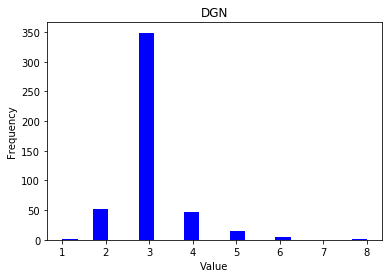

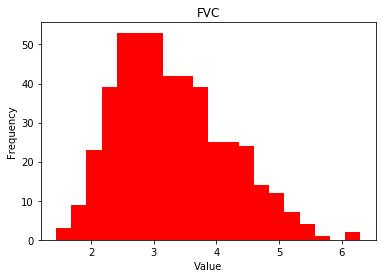

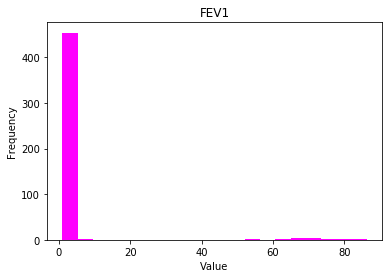

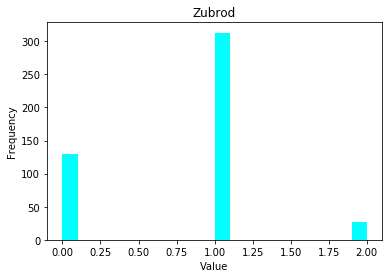

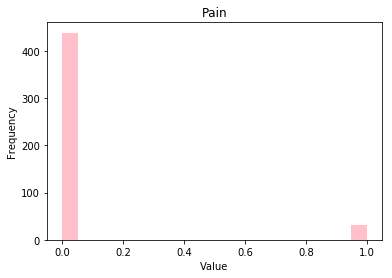

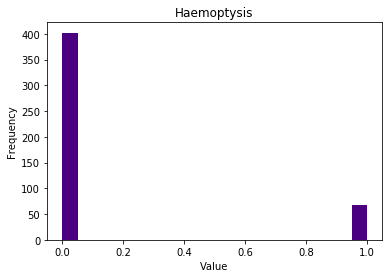

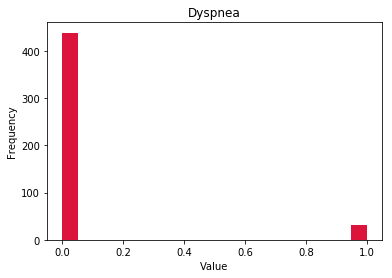

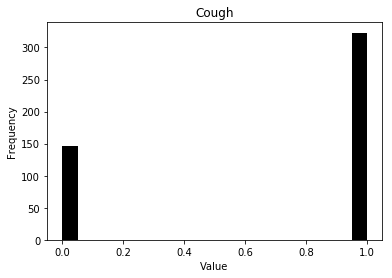

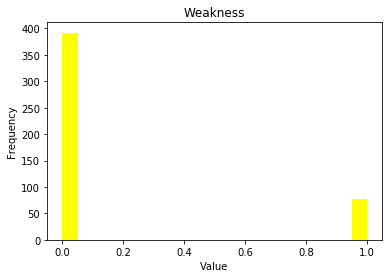

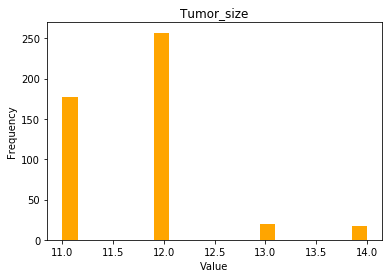

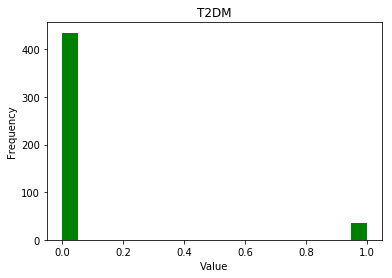

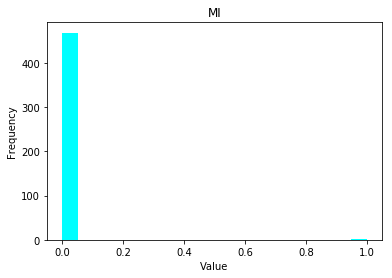

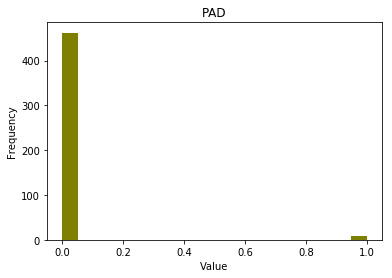

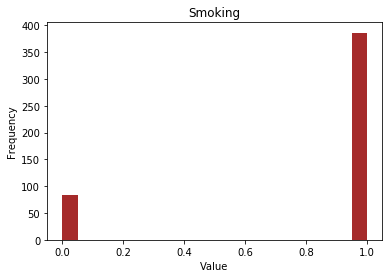

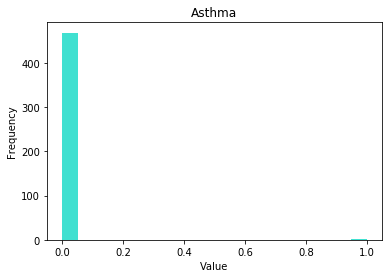

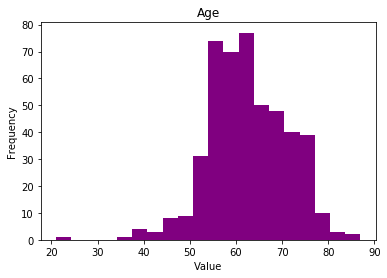

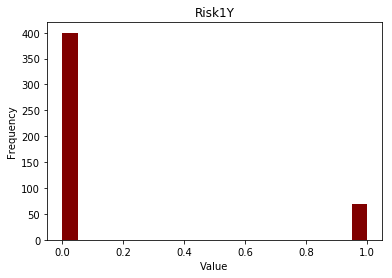

In [10]:
thoracic_df['DGN'].plot(kind='hist', bins=20, color='blue')
plt.xlabel('Value')
plt.title('DGN')
plt.show()

thoracic_df['FVC'].plot(kind='hist', bins=20, color='red')
plt.xlabel('Value')
plt.title('FVC')
plt.show()

thoracic_df['FEV1'].plot(kind='hist', bins=20, color='magenta')
plt.xlabel('Value')
plt.title('FEV1')
plt.show()

thoracic_df['Zubrod'].plot(kind='hist', bins=20, color='aqua')
plt.xlabel('Value')
plt.title('Zubrod')
plt.show()

thoracic_df['Pain'].plot(kind='hist', bins=20, color='pink')
plt.xlabel('Value')
plt.title('Pain')
plt.show()

thoracic_df['Haemoptysis'].plot(kind='hist', bins=20, color='indigo')
plt.xlabel('Value')
plt.title('Haemoptysis')
plt.show()

thoracic_df['Dyspnea'].plot(kind='hist', bins=20, color='crimson')
plt.xlabel('Value')
plt.title('Dyspnea')
plt.show()

thoracic_df['Cough'].plot(kind='hist', bins=20, color='black')
plt.xlabel('Value')
plt.title('Cough')
plt.show()

thoracic_df['Weakness'].plot(kind='hist', bins=20, color='yellow')
plt.xlabel('Value')
plt.title('Weakness')
plt.show()

thoracic_df['Tumor_size'].plot(kind='hist', bins=20, color='orange')
plt.xlabel('Value')
plt.title('Tumor_size')
plt.show()

thoracic_df['T2DM'].plot(kind='hist', bins=20, color='green')
plt.xlabel('Value')
plt.title('T2DM')
plt.show()

thoracic_df['MI'].plot(kind='hist', bins=20, color='cyan')
plt.xlabel('Value')
plt.title('MI')
plt.show()

thoracic_df['PAD'].plot(kind='hist', bins=20, color='olive')
plt.xlabel('Value')
plt.title('PAD')
plt.show()

thoracic_df['Smoking'].plot(kind='hist', bins=20, color='brown')
plt.xlabel('Value')
plt.title('Smoking')
plt.show()

thoracic_df['Asthma'].plot(kind='hist', bins=20, color='turquoise')
plt.xlabel('Value')
plt.title('Asthma')
plt.show()

thoracic_df['Age'].plot(kind='hist', bins=20, color='purple')
plt.xlabel('Value')
plt.title('Age')
plt.show()

thoracic_df['Risk1Y'].plot(kind='hist', bins=20, color='maroon')
plt.xlabel('Value')
plt.title('Risk1Y')
plt.show()

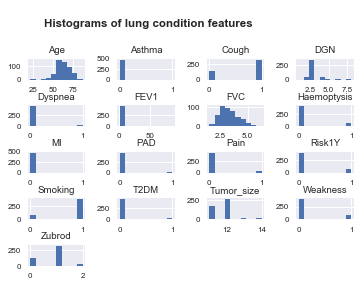

In [11]:
sns.set(font_scale=0.8)
thoracic_df.hist()
plt.suptitle('\nHistograms of lung condition features', fontweight='bold')
plt.tight_layout(rect=[0.15, 0, 1, 2.5], h_pad=6)
plt.subplots_adjust(top=0.80)
plt.show()

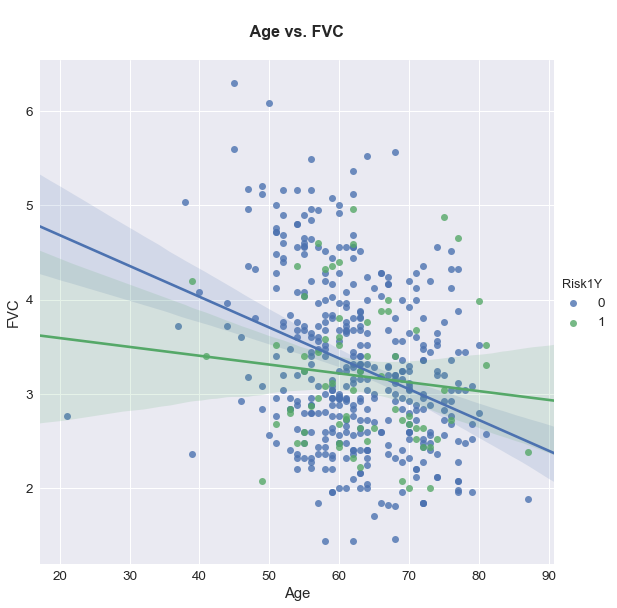

In [12]:
sns.set(font_scale=1.35)
sns.lmplot(x='Age', y='FVC', data=thoracic_df, hue='Risk1Y',size=8)
plt.title('\n Age vs. FVC \n', fontweight='bold')
plt.show()

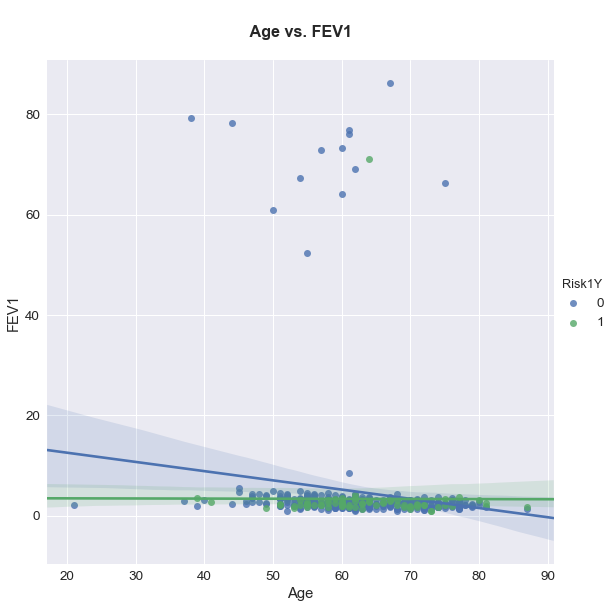

In [13]:
sns.set(font_scale=1.35)
axy = sns.lmplot(x='Age', y='FEV1', data=thoracic_df, hue='Risk1Y',size=8)
plt.title('\n Age vs. FEV1 \n', fontweight='bold')
#axy.set(ylim=(0, 10)) 
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('FEV1 ~ Age',thoracic_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   FEV1   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.372
Date:                Sun, 01 Jul 2018   Prob (F-statistic):             0.0119
Time:                        18:31:46   Log-Likelihood:                -1821.9
No. Observations:                 470   AIC:                             3648.
Df Residuals:                     468   BIC:                             3656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3644      3.918      3.666      0.0

Text(0.5,1,'Relationship between Original and Predicted FEV1 values')

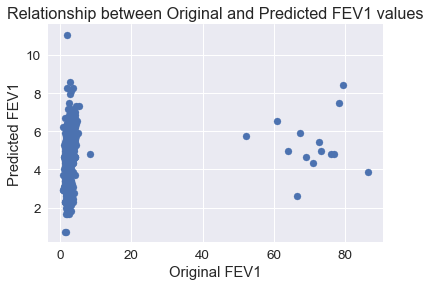

In [14]:
plt.scatter(thoracic_df.FEV1, m.fittedvalues)
plt.xlabel("Original FEV1")
plt.ylabel("Predicted FEV1")
plt.title("Relationship between Original and Predicted FEV1 values")

In [15]:
from sklearn.linear_model import LinearRegression
Xlr = thoracic_df.drop('FEV1', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lm.fit(Xlr, thoracic_df.FEV1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


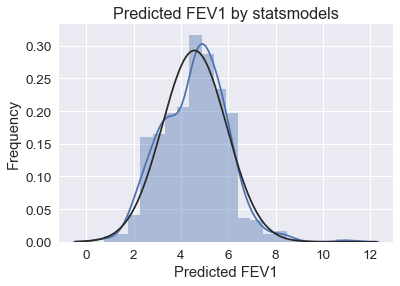

In [17]:
from scipy.stats import norm
sns.distplot(m.fittedvalues, hist=True, bins=20, fit=norm)
plt.title("Predicted FEV1 by statsmodels")
plt.xlabel("Predicted FEV1")
plt.ylabel("Frequency")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


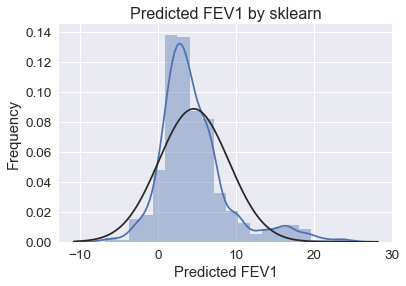

In [18]:
lm.predict(Xlr)
sns.distplot(lm.predict(Xlr), hist=True, bins=20, fit=norm)
plt.title("Predicted FEV1 by sklearn")
plt.xlabel("Predicted FEV1")
plt.ylabel("Frequency")
plt.show()

Text(0.5,1,'Relationship between Original and Predicted FEV1: sklearn')

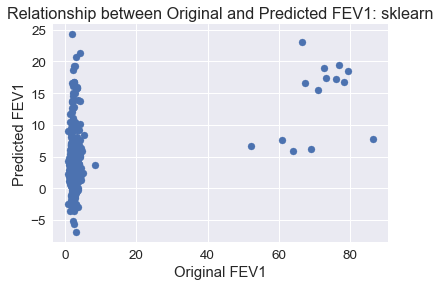

In [19]:
plt.scatter(thoracic_df.FEV1, lm.predict(Xlr))
plt.xlabel("Original FEV1")
plt.ylabel("Predicted FEV1")
plt.title("Relationship between Original and Predicted FEV1: sklearn")

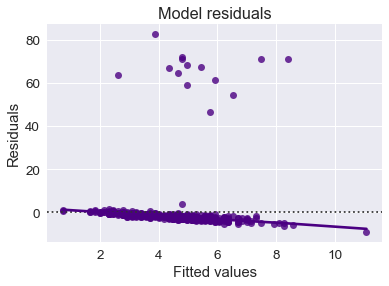

In [20]:
sns.residplot(m.fittedvalues, m.resid, lowess=True, color="indigo")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Model residuals')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


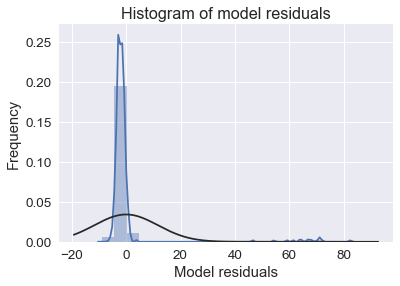

In [21]:
sns.distplot(m.resid, hist=True, bins=20, fit=norm)
plt.xlabel('Model residuals')
plt.ylabel('Frequency')
plt.title('Histogram of model residuals')
plt.show()

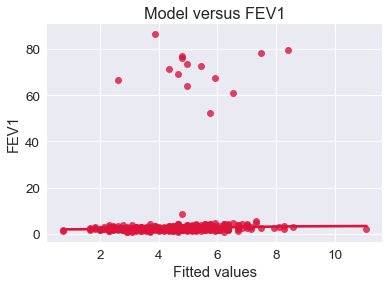

In [22]:
sns.regplot(m.fittedvalues, thoracic_df.FEV1, lowess=True, color='crimson')
plt.xlabel('Fitted values')
plt.title('Model versus FEV1')
plt.show()

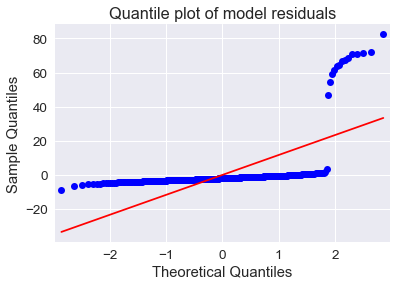

In [23]:
from statsmodels.graphics.gofplots import qqplot
qqplot(m.resid, line='s')
plt.title("Quantile plot of model residuals")
plt.show()

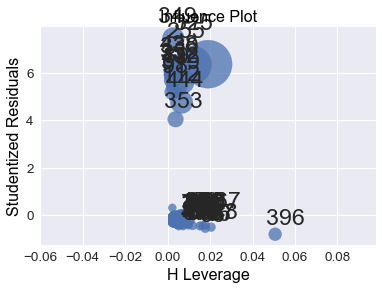

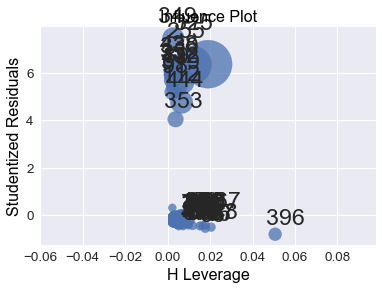

In [16]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(m)

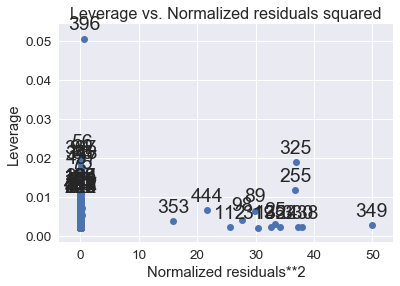

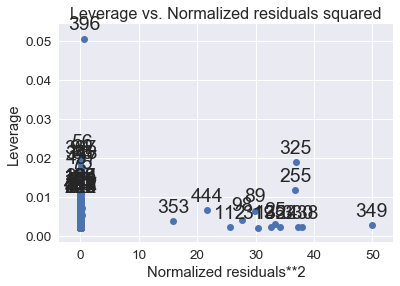

In [17]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(m)

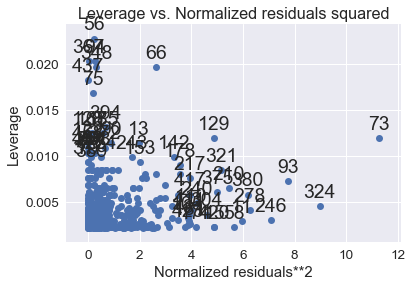

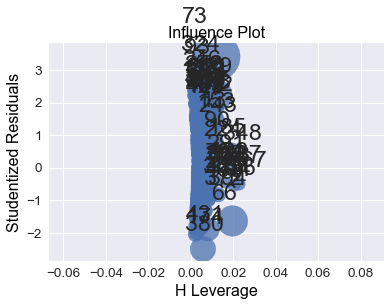

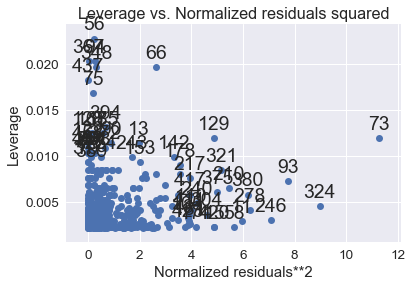

In [18]:
#thoracic_df_new = thoracic_df.drop(thoracic_df.index[[89,112,353,325,349,444,255,132,98,319]]) eh hard to see all
thoracic_df_new = thoracic_df[thoracic_df.FEV1 <40]
thoracic_df_new = thoracic_df_new.drop(thoracic_df.index[[215,396]]) #from doing the following on just the first drops
mnew = ols('FEV1 ~ Age',thoracic_df_new).fit()
influence_plot(mnew)
plot_leverage_resid2(mnew)

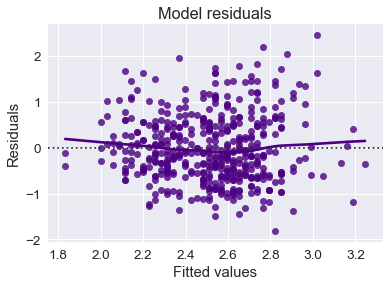

In [27]:
sns.residplot(mnew.fittedvalues, mnew.resid, lowess=True, color="indigo")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Model residuals')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Risk1Y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8605
Date:                Sun, 01 Jul 2018   Prob (F-statistic):              0.354
Time:                        17:18:16   Log-Likelihood:                -181.08
No. Observations:                 470   AIC:                             366.2
Df Residuals:                     468   BIC:                             374.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1549      0.018      8.779      0.0

Text(0.5,1,'Relationship between Original and Predicted Risk1Y values')

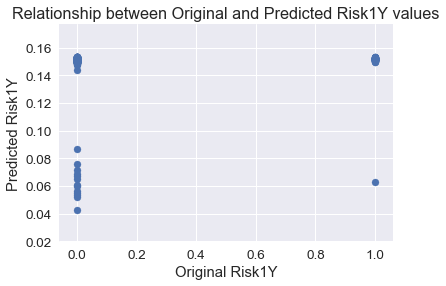

In [28]:
mmf = ols('Risk1Y ~ FEV1',thoracic_df).fit() #seeing if outliers in FEV1 may affect Risk1Y in the old thoracic df
print(mmf.summary())
plt.scatter(thoracic_df.Risk1Y, mmf.fittedvalues)
plt.xlabel("Original Risk1Y")
plt.ylabel("Predicted Risk1Y")
plt.title("Relationship between Original and Predicted Risk1Y values")

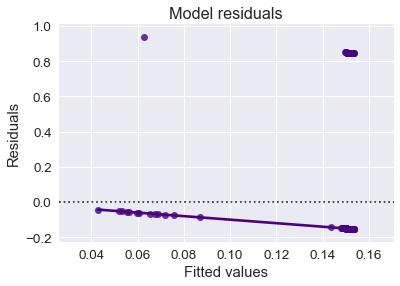

In [29]:
sns.residplot(mmf.fittedvalues, mmf.resid, lowess=True, color="indigo") #is this one u-shaped?
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Model residuals')
plt.show()

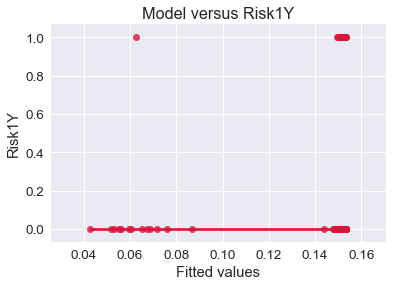

In [30]:
sns.regplot(mmf.fittedvalues, thoracic_df.Risk1Y, lowess=True, color='crimson')
plt.xlabel('Fitted values')
plt.title('Model versus Risk1Y')
plt.show()

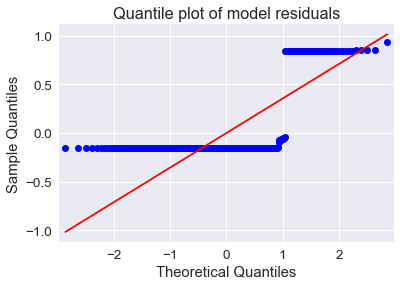

In [31]:
qqplot(mmf.resid, line='s')
plt.title("Quantile plot of model residuals")
plt.show()

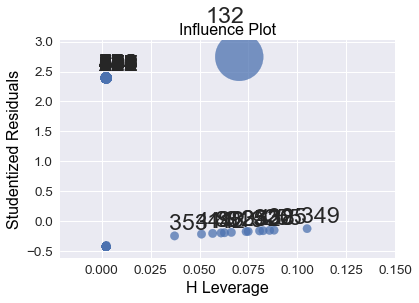

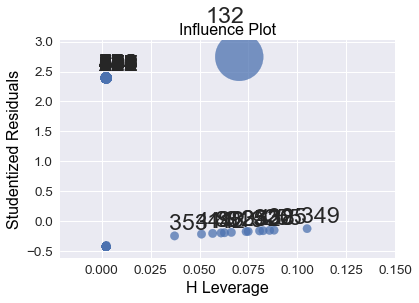

In [32]:
influence_plot(mmf)

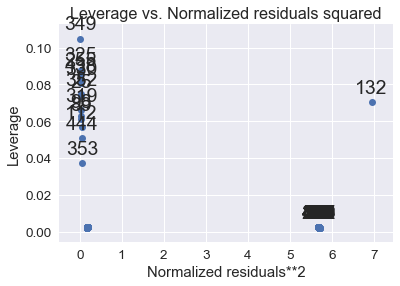

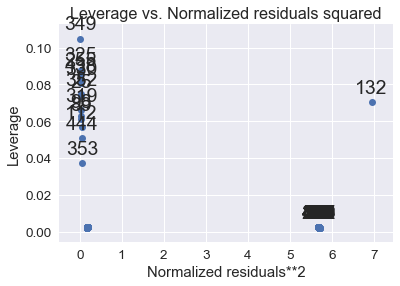

In [33]:
plot_leverage_resid2(mmf)

In [71]:
thoracic_df.iloc[132]       #shows that this individual passed away while having FEV1 of 71.1 - obvious influential outlier

DGN             2.0
FVC             2.5
FEV1           71.1
Zubrod          0.0
Pain            0.0
Haemoptysis     0.0
Dyspnea         1.0
Cough           0.0
Weakness        0.0
Tumor_size     13.0
T2DM            0.0
MI              0.0
PAD             0.0
Smoking         1.0
Asthma          0.0
Age            64.0
Risk1Y          1.0
Name: 132, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                 Risk1Y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.448
Date:                Sun, 01 Jul 2018   Prob (F-statistic):              0.118
Time:                        17:18:41   Log-Likelihood:                -177.88
No. Observations:                 454   AIC:                             359.8
Df Residuals:                     452   BIC:                             368.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2380      0.057      4.139      0.0

Text(0.5,1,'Relationship between Original and Predicted Risk1Y values')

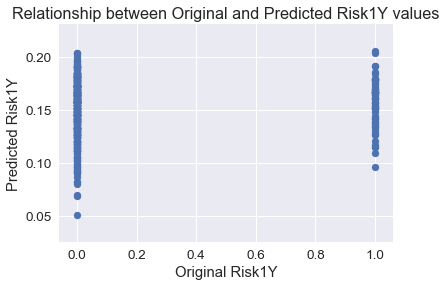

In [34]:
mmfnew = ols('Risk1Y ~ FEV1',thoracic_df_new).fit() #seeing if difference with the new thoracic df
print(mmfnew.summary())
plt.scatter(thoracic_df_new.Risk1Y, mmfnew.fittedvalues)
plt.xlabel("Original Risk1Y")
plt.ylabel("Predicted Risk1Y")
plt.title("Relationship between Original and Predicted Risk1Y values")

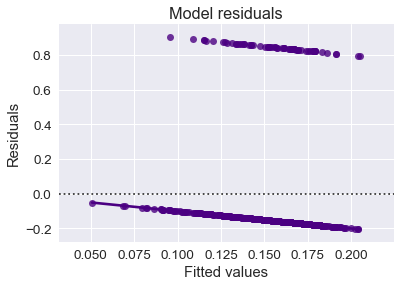

In [35]:
sns.residplot(mmfnew.fittedvalues, mmfnew.resid, lowess=True, color="indigo") #is this one u-shaped?
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Model residuals')
plt.show()

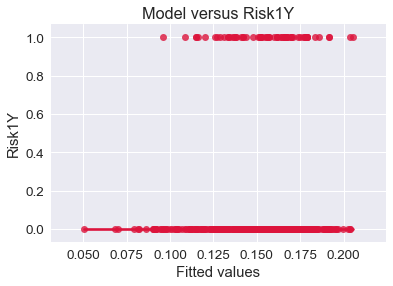

In [36]:
sns.regplot(mmfnew.fittedvalues, thoracic_df_new.Risk1Y, lowess=True, color='crimson')
plt.xlabel('Fitted values')
plt.title('Model versus Risk1Y')
plt.show()

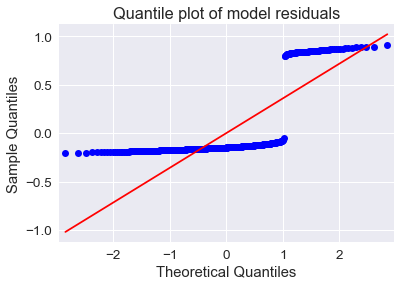

In [37]:
qqplot(mmfnew.resid, line='s')
plt.title("Quantile plot of model residuals")
plt.show()

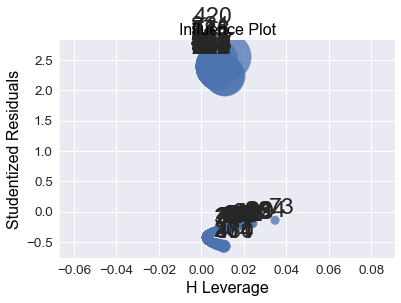

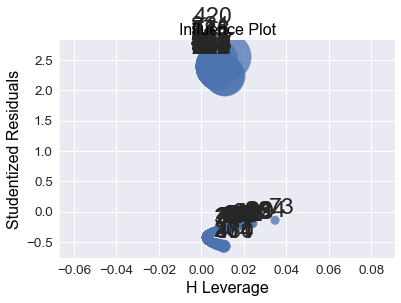

In [38]:
influence_plot(mmfnew)

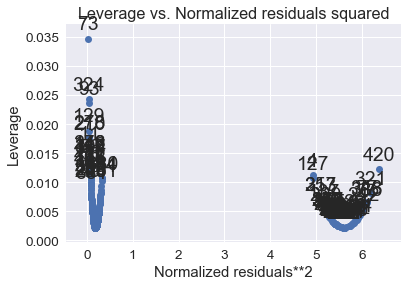

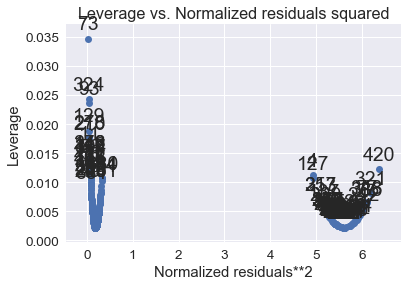

In [39]:
plot_leverage_resid2(mmfnew)

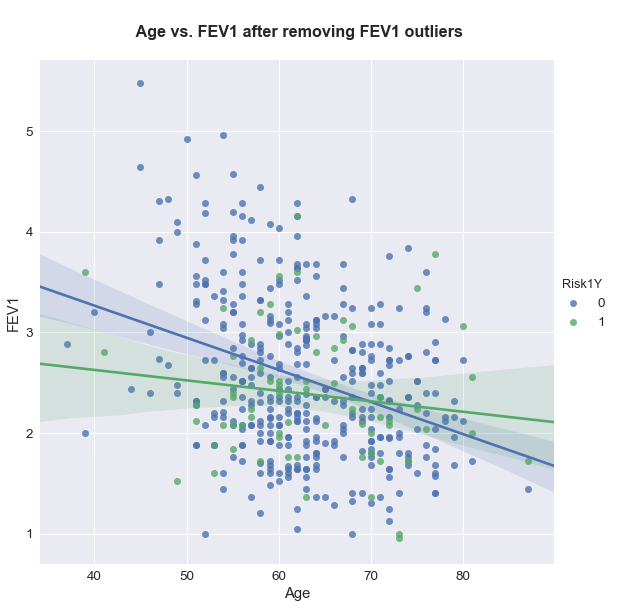

In [40]:
sns.set(font_scale=1.35)
axy = sns.lmplot(x='Age', y='FEV1', data=thoracic_df_new, hue='Risk1Y',size=8)
plt.title('\n Age vs. FEV1 after removing FEV1 outliers\n', fontweight='bold')
plt.show()

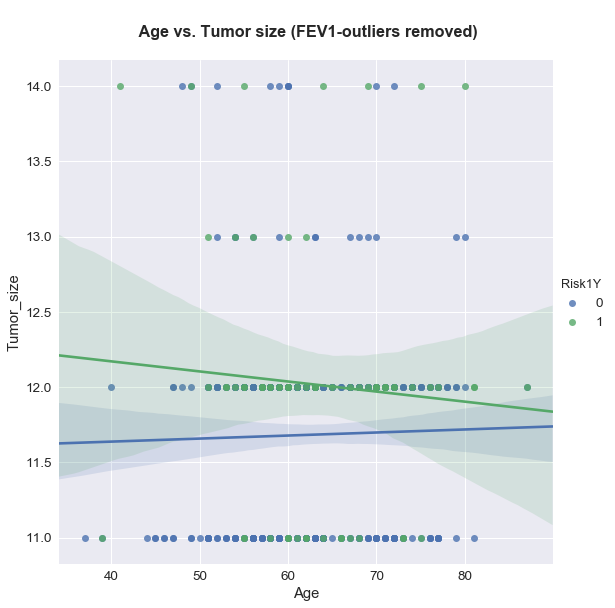

In [41]:
sns.set(font_scale=1.35)
sns.lmplot(x='Age', y='Tumor_size', data=thoracic_df_new, hue='Risk1Y',size=8)
plt.title('\n Age vs. Tumor size (FEV1-outliers removed)\n', fontweight='bold')
plt.show()

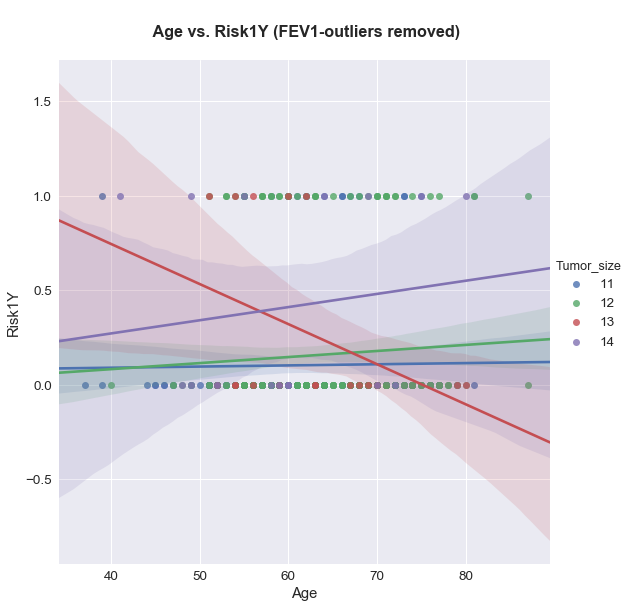

In [42]:
sns.set(font_scale=1.35)
sns.lmplot(x='Age', y='Risk1Y', data=thoracic_df_new, hue='Tumor_size',size=8)
plt.title('\n Age vs. Risk1Y (FEV1-outliers removed)\n', fontweight='bold')
plt.show()

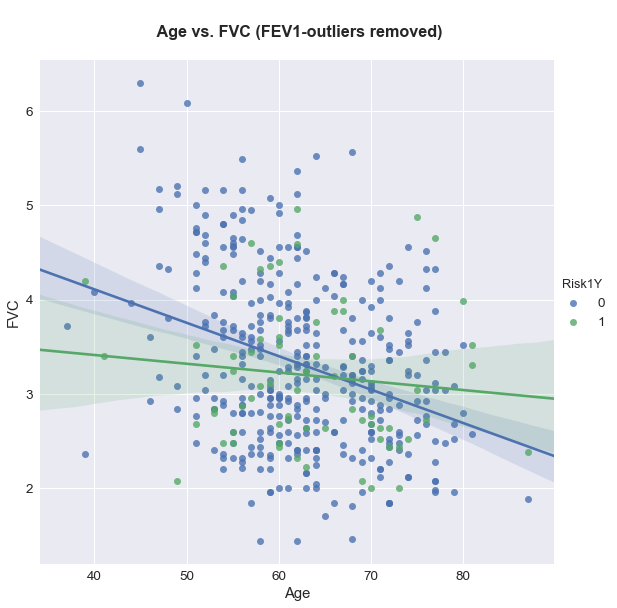

In [43]:
sns.set(font_scale=1.35)
sns.lmplot(x='Age', y='FVC', data=thoracic_df_new, hue='Risk1Y',size=8)
plt.title('\n Age vs. FVC (FEV1-outliers removed)\n', fontweight='bold')
plt.show()

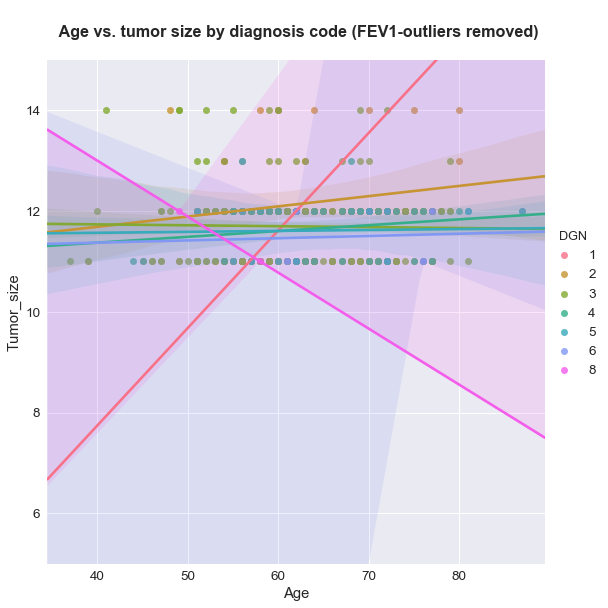

In [44]:
sns.set(font_scale=1.35)
axy1 = sns.lmplot(x='Age', y='Tumor_size', data=thoracic_df_new, hue='DGN',size=8)
plt.title('\n Age vs. tumor size by diagnosis code (FEV1-outliers removed)\n', fontweight='bold')
axy1.set(ylim=(5, 15)) 
plt.show()

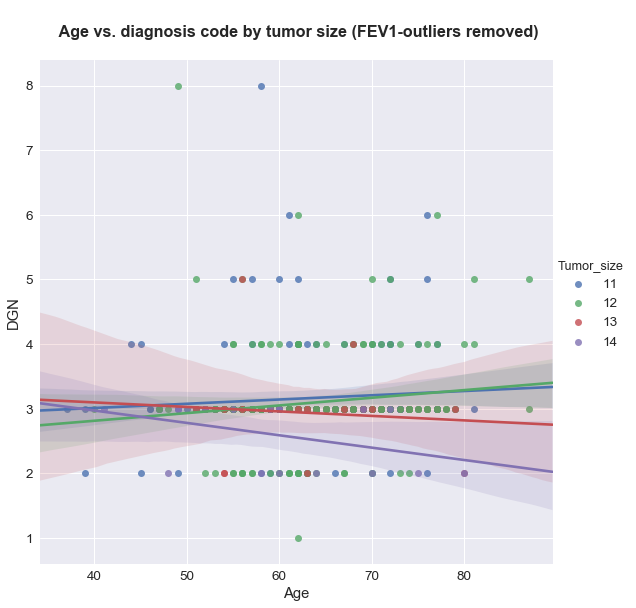

In [45]:
sns.set(font_scale=1.35)
sns.lmplot(x='Age', y='DGN', data=thoracic_df_new, hue='Tumor_size',size=8)
plt.title('\n Age vs. diagnosis code by tumor size (FEV1-outliers removed)\n', fontweight='bold')
plt.show()

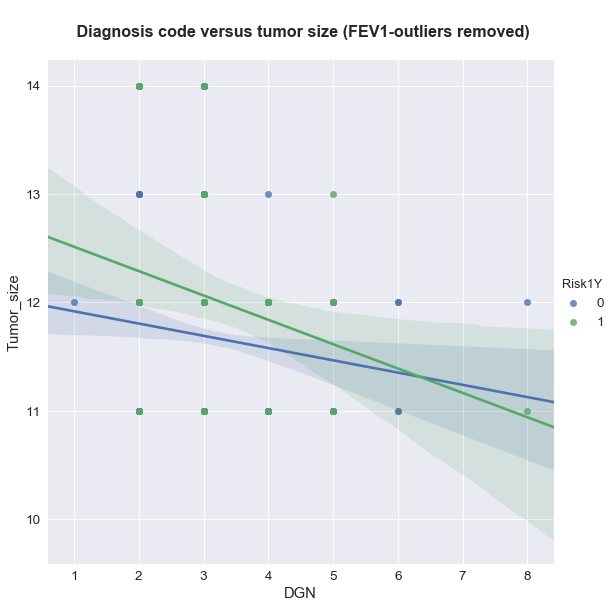

In [46]:
sns.set(font_scale=1.35)
sns.lmplot(x='DGN', y='Tumor_size', data=thoracic_df_new, hue='Risk1Y',size=8)
plt.title('\n Diagnosis code versus tumor size (FEV1-outliers removed)\n', fontweight='bold')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Risk1Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3515
Date:                Sun, 01 Jul 2018   Prob (F-statistic):              0.554
Time:                        17:19:41   Log-Likelihood:                -178.93
No. Observations:                 454   AIC:                             361.9
Df Residuals:                     452   BIC:                             370.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0775      0.127      0.612      0.5

Text(0.5,1,'Relationship between Original and Predicted Risk1Y values')

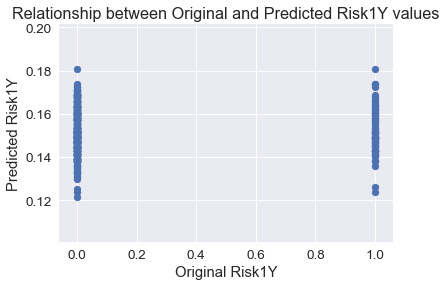

In [47]:
mmort = ols('Risk1Y ~ Age',thoracic_df_new).fit()
print(mmort.summary())
plt.scatter(thoracic_df_new.Risk1Y, mmort.fittedvalues)
plt.xlabel("Original Risk1Y")
plt.ylabel("Predicted Risk1Y")
plt.title("Relationship between Original and Predicted Risk1Y values")

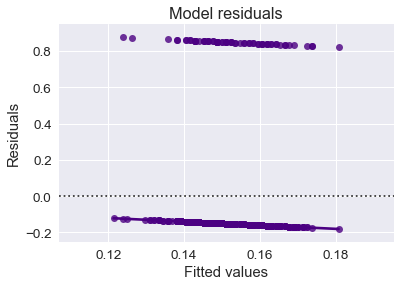

In [48]:
sns.residplot(mmort.fittedvalues, mmort.resid, lowess=True, color="indigo") #is this one u-shaped?
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Model residuals')
plt.show()

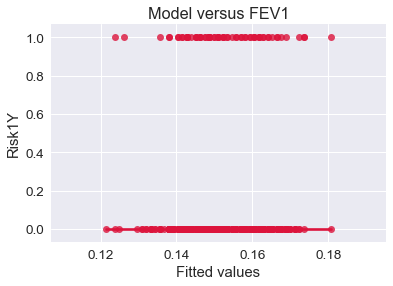

In [49]:
sns.regplot(mmort.fittedvalues, thoracic_df_new.Risk1Y, lowess=True, color='crimson')
plt.xlabel('Fitted values')
plt.title('Model versus FEV1')
plt.show()

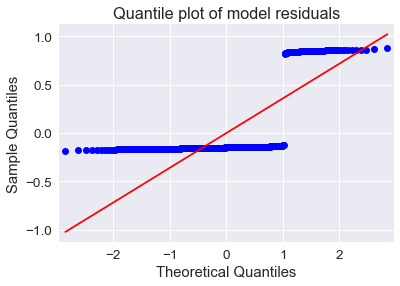

In [50]:
qqplot(mmort.resid, line='s')
plt.title("Quantile plot of model residuals")
plt.show()

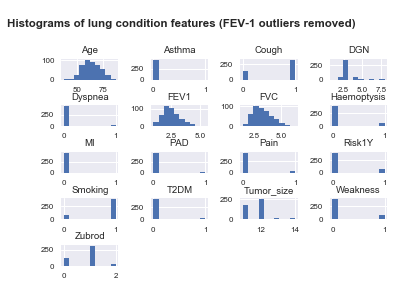

In [51]:
sns.set(font_scale=0.8)
thoracic_df_new.hist()
plt.suptitle('\nHistograms of lung condition features (FEV-1 outliers removed)', fontweight='bold')
plt.tight_layout(rect=[0.15, 0, 1, 2.5], h_pad=6)
plt.subplots_adjust(top=0.80)
plt.show()


Heatmap of correlations between variables


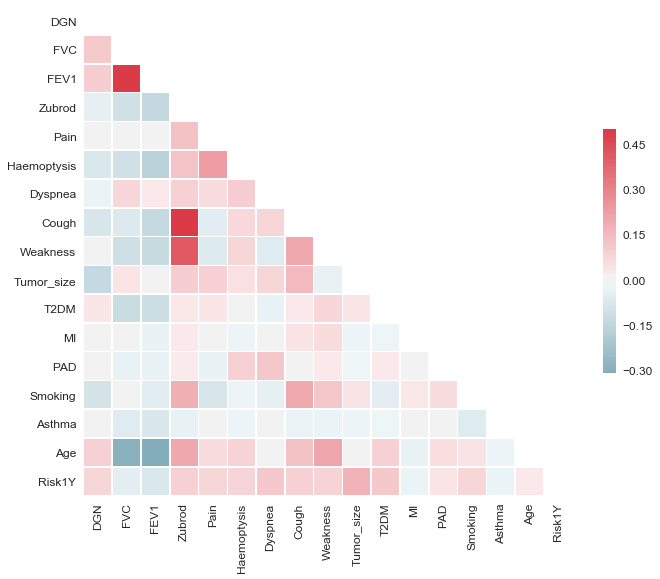

In [52]:
sns.set(style="white", font_scale=1.20)
corr = thoracic_df_new.corr()
mask = np.zeros_like(corr, dtype=np.bool)
# mask upper triangle by replacing values with 0 and masking zeros
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('\033[1m' + "\nHeatmap of correlations between variables")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [53]:
def pearson_general(colA, colB, alpha=0.001):
    A = thoracic_df_new[colA].astype(float)
    B = thoracic_df_new[colB].astype(float) 
    
    r, p = pearsonr(B,A)
    if p<alpha:
        result="\033[1m {} with {}:".format(colA,colB)
    else:
        result="\033[0m {} with {}:".format(colA,colB)
    print(result, f"Pearson r = {round(r,3)}, p = {round(p,5)}")

print('\033[4m\033[1m\nPearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:\n\033[0m')
cols = ['FVC', 'FEV1', 'Age']
for e,f in itertools.combinations(cols,2):
    pearson_general(e,f)


Pearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:

 FVC with FEV1: Pearson r = 0.888, p = 0.0
 FVC with Age: Pearson r = -0.299, p = 0.0
 FEV1 with Age: Pearson r = -0.31, p = 0.0


In [54]:
def Chi2test_general(colV, colZ, alpha=0.001):
    V = thoracic_df_new[colV].astype(str)
    Z = thoracic_df_new[colZ].astype(str)        
    obs = pd.crosstab(Z,V) 
    chi2, p, dof, expected = stats.chi2_contingency(obs.values)        
    Expected = pd.DataFrame(expected, columns=obs.columns, index = obs.index)
    if p<alpha:
        result="\033[1m {} with {}:".format(colV,colZ)
    else:
        result="\033[0m {} with {}:".format(colV,colZ)
    print(result, f"Chi-square stat. = {round(chi2,2)}, p = {round(p,5)}")
    
print('\033[4m\033[1m\nChi-square statistics and p-values (p) for relationships between categorical variables:\n\033[0m')  
Columns = ['DGN', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'Tumor_size', 'MI', 'PAD', 'Smoking', 'Asthma', 'Risk1Y']
for g,h in itertools.combinations(Columns,2):
    Chi2test_general(g,h)


Chi-square statistics and p-values (p) for relationships between categorical variables:

 DGN with Zubrod: Chi-square stat. = 12.76, p = 0.38675
 DGN with Pain: Chi-square stat. = 0.89, p = 0.98938
 DGN with Haemoptysis: Chi-square stat. = 6.56, p = 0.36365
 DGN with Dyspnea: Chi-square stat. = 1.59, p = 0.95343
 DGN with Cough: Chi-square stat. = 9.09, p = 0.16847
 DGN with Weakness: Chi-square stat. = 3.62, p = 0.72757
 DGN with Tumor_size: Chi-square stat. = 25.72, p = 0.1063
 DGN with MI: Chi-square stat. = 0.67, p = 0.99504
 DGN with PAD: Chi-square stat. = 5.26, p = 0.51048
 DGN with Smoking: Chi-square stat. = 10.49, p = 0.1053
 DGN with Asthma: Chi-square stat. = 0.67, p = 0.99504
 DGN with Risk1Y: Chi-square stat. = 21.56, p = 0.00145
 Zubrod with Pain: Chi-square stat. = 8.21, p = 0.01651
 Zubrod with Haemoptysis: Chi-square stat. = 7.76, p = 0.02062
 Zubrod with Dyspnea: Chi-square stat. = 3.99, p = 0.13606
 Zubrod with Cough: Chi-square stat. = 259.27, p = 0.0
 Zubrod with

In [67]:
thoracic_df_new['Risk1Y'].value_counts()

0    385
1     69
Name: Risk1Y, dtype: int64

In [79]:
X = thoracic_df_new.drop('Risk1Y', axis = 1)
y = thoracic_df_new.Risk1Y


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [80]:
y_train.value_counts()

0    277
1     63
Name: Risk1Y, dtype: int64

In [121]:
y_test.value_counts()

0    108
1      6
Name: Risk1Y, dtype: int64

In [97]:
y_train = pd.DataFrame(y_train)
y_train.columns = ['Risk1Y']
train_df = pd.merge(X_train, y_train, how='outer', left_index=True, right_index=True, left_on=None, right_on=None )
train_df.columns

Index(['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea',
       'Cough', 'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking',
       'Asthma', 'Age', 'Risk1Y'],
      dtype='object')

In [100]:
#from https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample




train_df_majority = train_df[train_df.Risk1Y==0]
train_df_minority = train_df[train_df.Risk1Y==1]

train_df_minority_upsampled = resample(train_df_minority,
                                             replace=True,
                                             n_samples=277,
                                             random_state=29)

train_upsampled = pd.concat([train_df_majority, train_df_minority_upsampled])


Xu = train_upsampled.drop('Risk1Y', axis = 1)
yu = train_upsampled.Risk1Y

#so now Xu, X_test, yu, y_test is how the train test split goes

In [101]:
#no train-test split here, just the whole smoted dataset using cv



class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, Xu, yu, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(Xu, yu)
            self.grid_searches[key] = gs    
    
    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})
                      
        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params),1))
            all_scores = np.hstack(scores)
            for p,s in zip(params,all_scores):
                rows.append((row(k,s,p)))
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [102]:
models1 = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}

params1 = { 
    'ExtraTreesClassifier': { 'n_estimators': [16, 32, 100] },
    'RandomForestClassifier': { 'n_estimators': [16, 32, 100] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32, 100] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32, 100], 'learning_rate': [0.8, 1.0] },
    'XGBClassifier': [{ 'n_estimators': [16, 32, 100]}, {'max_depth': [4, 20]}, {'min_child_weight': [1, 10]}, {'gamma': [0.01, 0.1]}],
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100]},
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(Xu, yu, scoring='f1', n_jobs=-1)

helper1.score_summary(sort_by='mean_score')

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.5s finished


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.5s finished


Running GridSearchCV for XGBClassifier.
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.0s finished


Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
SVC
LogisticRegression


estimator min_score mean_score max_score    std_score  \
5       RandomForestClassifier  0.918367    0.93587  0.946237    0.0124461   
2         ExtraTreesClassifier  0.932642   0.935717  0.941176   0.00387041   
3       RandomForestClassifier  0.916667   0.933683  0.946237    0.0124773   
1         ExtraTreesClassifier  0.907216   0.932357  0.956522    0.0201406   
4       RandomForestClassifier  0.927835    0.93232  0.939394   0.00506178   
0         ExtraTreesClassifier       0.9   0.931384  0.947917    0.0222027   
19               XGBClassifier  0.895522   0.905759  0.919192   0.00992369   
11  GradientBoostingClassifier  0.895522   0.904224  0.919192    0.0106302   
14  GradientBoostingClassifier  0.882353   0.903454  0.920792    0.0159167   
10  GradientBoostingClassifier  0.895522   0.896678  0.897959  0.000998802   
13  GradientBoostingClassifier  0.878049   0.895902  0.916256     0.015698   
9   GradientBoostingClassifier  0.864322   0.875916  0.887805   0.00958926   
18               XGBClassifier  0.848485   0.873168  0.886598    0.0174764   
12  GradientBoostingClassifier  0.835821   0.867713  0.907317    0.0296933   
23               XGBClassifier  0.836735   0.846701  0.865672    0.0134201   
22               XGBClassifier  0.829787   0.844946  0.865672    0.0151695   
20               XGBClassifier  0.829787   0.844946  0.865672    0.0151695   
17               XGBClassifier  0.829787   0.844946  0.865672    0.0151695   
8           AdaBoostClassifier  0.791667   0.801017  0.817734    0.0118483   
16               XGBClassifier  0.737968   0.755537  0.775956     0.015639   
7           AdaBoostClassifier  0.687831   0.739915  0.776596    0.0378398   
21               XGBClassifier  0.705263   0.731954  0.748663     0.019072   
15               XGBClassifier  0.663043   0.717782  0.764045    0.0416669   
6           AdaBoostClassifier  0.700508   0.715896  0.733668    0.0136423   
34          LogisticRegression  0.592179     0.6323  0.659218    0.0289171   
25                         SVC  0.587571   0.631284  0.659574    0.0313532   
33          LogisticRegression  0.596685   0.627877  0.655367    0.0240995   
24                         SVC  0.571429   0.610722  0.630435    0.0277848   
31          LogisticRegression  0.557377   0.608379  0.666667    0.0449138   
28                         SVC  0.549451   0.603264  0.640777    0.0390249   
30          LogisticRegression  0.568306   0.602031  0.657143     0.039294   
32          LogisticRegression  0.569832   0.601551  0.633663    0.0260604   
27                         SVC  0.494253   0.509745  0.538012    0.0200185   
29                         SVC     0.375   0.416579      0.48    0.0455636   
26                         SVC  0.366197   0.401969  0.447552    0.0339301   

       C   gamma  kernel learning_rate max_depth min_child_weight n_estimators  
5    NaN     NaN     NaN           NaN       NaN              NaN          100  
2    NaN     NaN     NaN           NaN       NaN              NaN          100  
3    NaN     NaN     NaN           NaN       NaN              NaN           16  
1    NaN     NaN     NaN           NaN       NaN              NaN           32  
4    NaN     NaN     NaN           NaN       NaN              NaN           32  
0    NaN     NaN     NaN           NaN       NaN              NaN           16  
19   NaN     NaN     NaN           NaN        20              NaN          NaN  
11   NaN     NaN     NaN           0.8       NaN              NaN          100  
14   NaN     NaN     NaN             1       NaN              NaN          100  
10   NaN     NaN     NaN           0.8       NaN              NaN           32  
13   NaN     NaN     NaN             1       NaN              NaN           32  
9    NaN     NaN     NaN           0.8       NaN              NaN           16  
18   NaN     NaN     NaN           NaN         4              NaN          NaN  
12   NaN     NaN     NaN             1       NaN              NaN           16

In [103]:
#this requires doing a new train test split on the data - don't know how to get around that with smote
#binary test with y being true for mortality
#X1_u_df = pd.DataFrame(Xu)
Xu.columns = ['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking', 'Asthma', 'Age']

xgb_full = xgboost.DMatrix(Xu, label=yu)

# create a train/test split
#X50_train, X50_test, y50_train, y50_test = train_test_split(Xu, yu, test_size=0.2, random_state=7)
xgb50_train = xgboost.DMatrix(Xu, label=yu)
xgb50_test = xgboost.DMatrix(X_test, label=y_test)
# use validation set to choose # of trees
#params = {"eta": 0.002,"max_depth": 3,"objective": "survival:cox","subsample": 0.5}
#model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
#model_train = xgboost.train(xgb50_train, 500, evals = [(xgb50_test, "test")])
#model = xgboost.train(params, xgb_full, 100, evals = [(xgb_full, "test")])

# train XGBoost model; integer in xgboost.train is number of iterations; 500 and 800 gave same answer. 400, 100 didn't.
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(Xu, label=yu), 500)

In [104]:
# load JS visualization code to notebook
shap.initjs() 

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
shap_values = shap.TreeExplainer(model).shap_values(Xu)

# visualize the first prediction's explanation
shap.force_plot(shap_values[4,:], Xu.iloc[4,:])

In [105]:
print(Xu.iloc[0])
print(yu.iloc[0])
print(Xu.iloc[4])
print(yu.iloc[4]) 
print(Xu.iloc[20]) 
print(yu.iloc[20])

DGN             3.00
FVC             2.96
FEV1            2.20
Zubrod          1.00
Pain            0.00
Haemoptysis     0.00
Dyspnea         0.00
Cough           1.00
Weakness        0.00
Tumor_size     12.00
T2DM            0.00
MI              0.00
PAD             0.00
Smoking         1.00
Asthma          0.00
Age            63.00
Name: 287, dtype: float64
0
DGN             3.00
FVC             3.76
FEV1            3.12
Zubrod          0.00
Pain            0.00
Haemoptysis     0.00
Dyspnea         0.00
Cough           0.00
Weakness        0.00
Tumor_size     11.00
T2DM            0.00
MI              0.00
PAD             0.00
Smoking         1.00
Asthma          0.00
Age            61.00
Name: 466, dtype: float64
0
DGN             4.00
FVC             3.30
FEV1            2.56
Zubrod          0.00
Pain            0.00
Haemoptysis     0.00
Dyspnea         0.00
Cough           0.00
Weakness        0.00
Tumor_size     11.00
T2DM            0.00
MI              0.00
PAD             0.00

In [106]:
#shap.force_plot(shap_values, X)
shap.force_plot(shap_values, Xu)

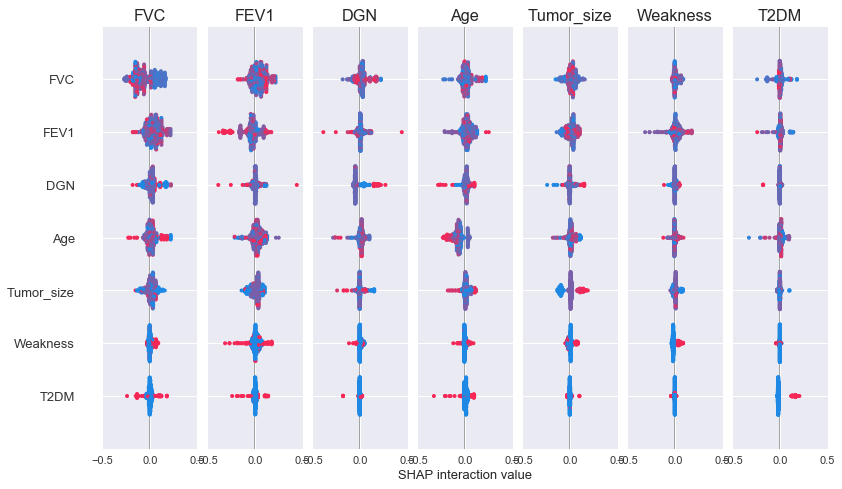

In [107]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(Xu)
shap.summary_plot(shap_interaction_values, Xu)

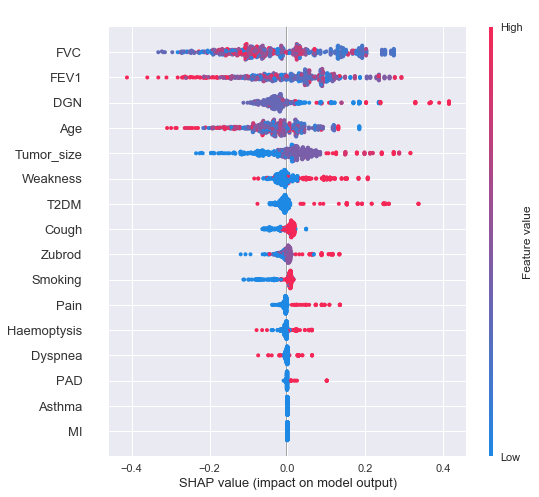

In [108]:
# summarize the effects of all the features
shap.summary_plot(shap_values, Xu)

Basic Random Forest accuracy on training data: 1.0
Basic Random Forest accuracy on test data: 0.921
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       108
          1       0.20      0.17      0.18         6

avg / total       0.91      0.92      0.92       114

[[104   4]
 [  5   1]]
ROC score for tuned Random Forest model: 0.7014


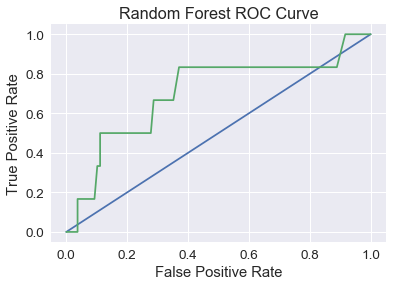

In [109]:
#using pre-upsampled train-test split for test data and upsampled training data

rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xu, yu)
print('Basic Random Forest accuracy on training data:',round(rf.score(Xu, yu),3))
print('Basic Random Forest accuracy on test data:',round(rf.score(X_test, y_test),3))
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test, rf_pred))

ry_pred_prob = rf.predict_proba(X_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(y_test, ry_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, ry_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()



Accuracy on training data: 1.0
Accuracy on test data: 0.86
             precision    recall  f1-score   support

          0       0.95      0.90      0.92       108
          1       0.08      0.17      0.11         6

avg / total       0.91      0.86      0.88       114

[[97 11]
 [ 5  1]]
ROC score for XGBoost model: 0.733


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


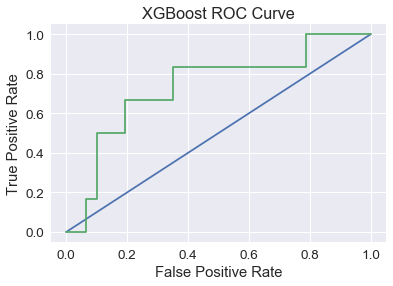

In [110]:
#xgboost with 20 max depth



xgbo = XGBClassifier(max_depth=20)
xgbo.fit(Xu, yu)
xy_pred = xgbo.predict(X_test)
predictionsx = [round(value) for value in xy_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgbo.score(Xu, yu),3))
print('Accuracy on test data:',round(xgbo.score(X_test, y_test),3))
print(classification_report(y_test,xy_pred))
print(confusion_matrix(y_test,xy_pred))

xy_pred_prob = xgbo.predict_proba(X_test)[:,1]
print('ROC score for XGBoost model:', round(roc_auc_score(y_test, xy_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, xy_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()




Accuracy on training data: 1.0
Accuracy on test data: 0.904
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       108
          1       0.00      0.00      0.00         6

avg / total       0.90      0.90      0.90       114

[[103   5]
 [  6   0]]
ROC score for Extra Trees model: 0.6127


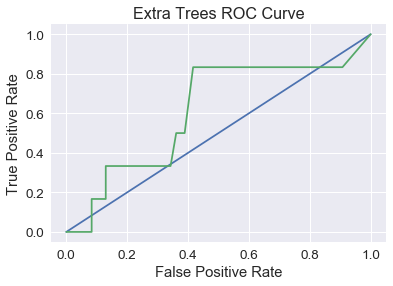

In [111]:
#extra trees with 100 estimators 

#EX_train, EX_test, ey_train, ey_test = train_test_split(X_sm, y_sm, random_state=29)
extra = ExtraTreesClassifier(n_estimators=100, random_state=0)
extra.fit(Xu, yu)

print('Accuracy on training data:',round(extra.score(Xu, yu),3))
print('Accuracy on test data:',round(extra.score(X_test, y_test),3))
extra_pred = extra.predict(X_test)
print(classification_report(y_test,extra_pred))
print(confusion_matrix(y_test,extra_pred))

ey_pred_prob = extra.predict_proba(X_test)[:,1]
print('ROC score for Extra Trees model:', round(roc_auc_score(y_test, ey_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, ey_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Extra Trees Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extra Trees ROC Curve')
plt.show()


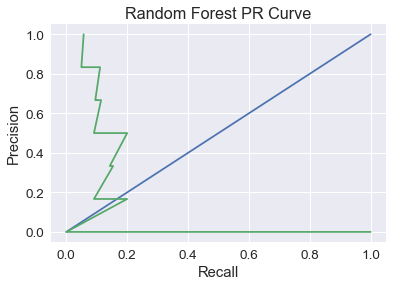

In [112]:
#random forest with 100 estimators




ry_pred = rf.predict_proba(X_test)[:,1]
p, r, _ = precision_recall_curve(y_test, ry_pred)

plt.plot([0,1],[0,1])
plt.plot(p,r, label='Random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest PR Curve')
plt.show()


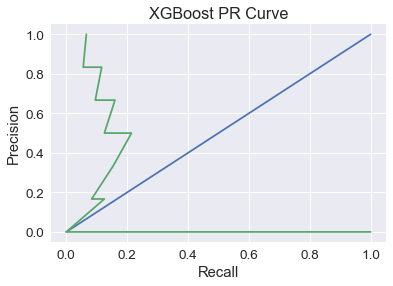

In [113]:
#xgboost with 20 max depth



xy_pred = xgbo.predict_proba(X_test)[:,1]
px, rx, _ = precision_recall_curve(y_test, xy_pred)

plt.plot([0,1],[0,1])
plt.plot(px,rx, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost PR Curve')
plt.show()




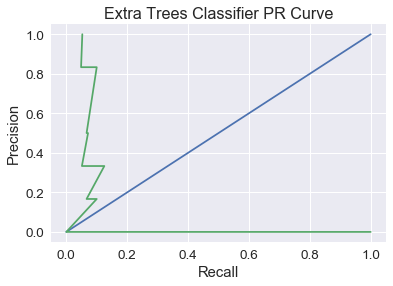

In [114]:
#extra trees with 100 estimators 



ey_pred = extra.predict_proba(X_test)[:,1]
plr, rlr, _ = precision_recall_curve(y_test, ey_pred)

plt.plot([0,1],[0,1])
plt.plot(plr,rlr, label='Extra Trees Classifer')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extra Trees Classifier PR Curve')
plt.show()

In [115]:
#Retrying XGBoost classifier here

#X1_sm_df = pd.DataFrame(X1_sm)
#X1_sm_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'location_Cleveland', 'location_Hungary', 'location_Long_Beach']
#CX18_train, CX18_test, cy18_train, cy18_test = train_test_split(X1_u_df, yu, test_size=0.2, random_state=7)
xgb = XGBClassifier(max_depth=20)
xgb.fit(Xu, yu)
print(xgb)
yxg_pred = xgb.predict(X_test)
predictions1 = [round(value) for value in yxg_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgb.score(Xu, yu),3))
print('Accuracy on test data:',round(xgb.score(X_test, y_test),3))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy on training data: 1.0
Accuracy on test data: 0.86


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


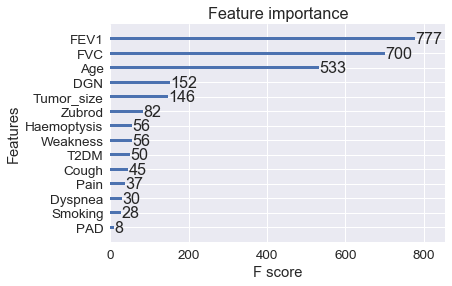

             precision    recall  f1-score   support

          0       0.95      0.90      0.92       108
          1       0.08      0.17      0.11         6

avg / total       0.91      0.86      0.88       114



In [116]:

plot_importance(xgb)
plt.show()
print(classification_report(y_test,predictions1))

In [117]:
print(confusion_matrix(y_test,predictions1))

[[97 11]
 [ 5  1]]


In [120]:
#For mortality as the positive signal
#With training xgboost before pred_contribs - so far output very similar

from xgboost import XGBClassifier, DMatrix
test_size = 0.2
Xnp = np.asarray(Xu)
ynp = np.asarray(yu)
#ynp = np.asarray(thoracic_df.Risk1Y)


print(Xu.shape)
#xgbpred = XGBClassifier()
#X51_train, X51_test, y51_train, y51_test = train_test_split(Xnp, ynp, test_size=test_size, random_state=29)
xgbpredtrain = XGBClassifier()
xgbpredtrain.fit(Xnp, ynp)
boostertrain = xgbpredtrain.get_booster()
# Using only a single sample for predict, you can use multiple
test_X51 = [Xnp[0]]
#print(ynp)
# Wrapping the test X into a DMatrix, need by Booster
predictionstrain = boostertrain.predict(DMatrix(test_X51), pred_contribs=True)

print(predictionstrain.shape)
print(predictionstrain)
print(predictionstrain.sum())

predictionsdf = pd.DataFrame(predictionstrain)
sumpred = predictionstrain.sum()
predictionsdf['sum'] = pd.Series(sumpred, index=predictionsdf.index)
predictionsdf.columns=['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 
                       'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking', 'Asthma', 'Age', 'bias', 'SUM']
display(HTML(predictionsdf.to_html(index=False)))

predictionssidedf = predictionsdf.T
#sample == 0
predictionssidedf.columns = ['prediction contributions']
display(HTML(predictionssidedf.to_html(index=True)))

(554, 16)
(1, 17)
[[-0.10329466 -1.0730804   0.11597884  0.00807659 -0.06140809 -0.00129255
  -0.0032538   0.07196817 -0.06096848  0.07572067 -0.07617511  0.
   0.          0.089854    0.         -0.15038684 -0.00428001]]
-1.1725416


In [43]:
'''
knn = KNeighborsClassifier()

#X1_u_df = pd.DataFrame(Xu)
#X1_u_df.columns = ['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking', 'Asthma', 'Age']

#R1X_train, R1X_test, r1y_train, r1y_test = train_test_split(X1_u_df, yu, random_state=29)
#rf1 = RandomForestClassifier(n_estimators=100)
#rf1.fit(R1X_train, r1y_train)
#random forest in shap - shap says treeexplainer doesn't support extra trees. apparently rf needs kernel explainer..

shap.initjs() 

knn.fit(X_train, y_train)
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

#X_train, RX_test, ry_train, ry_test = train_test_split(Xu, yu, random_state=29)
med = X_train.median().values.reshape((1,X_train.shape[1]))
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(med, y_train)

explainer = shap.KernelExplainer(f, med)

shap_values_single = explainer.shap_values(med.iloc[0,:], nsamples=500)

shap.force_plot(shap_values_single, X_test)

#shap_values = shap.TreeExplainer(rf1).shap_values(X1_sm_df)
#shap_values = shap.KernelExplainer(rf1.predict_proba, R1X_train).shap_values(R1X_test)
#shap.force_plot(shap_values[0,:], X1_sm_df.iloc[0,:])
#shap.force_plot(shap_values[0], R1X_test)
'''

"\nknn = KNeighborsClassifier()\n\n#X1_u_df = pd.DataFrame(Xu)\n#X1_u_df.columns = ['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking', 'Asthma', 'Age']\n\n#R1X_train, R1X_test, r1y_train, r1y_test = train_test_split(X1_u_df, yu, random_state=29)\n#rf1 = RandomForestClassifier(n_estimators=100)\n#rf1.fit(R1X_train, r1y_train)\n#random forest in shap - shap says treeexplainer doesn't support extra trees. apparently rf needs kernel explainer..\n\nshap.initjs() \n\nknn.fit(X_train, y_train)\nf = lambda x: knn.predict_proba(x)[:,1]\nmed = X_train.median().values.reshape((1,X_train.shape[1]))\n\n#X_train, RX_test, ry_train, ry_test = train_test_split(Xu, yu, random_state=29)\nmed = X_train.median().values.reshape((1,X_train.shape[1]))\nrf1 = RandomForestClassifier(n_estimators=100)\nrf1.fit(med, y_train)\n\nexplainer = shap.KernelExplainer(f, med)\n\nshap_values_single = explainer.shap_values(med.iloc[0,:], nsa

In [76]:
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train, y_train)

shap_values = shap.KernelExplainer(rf1.predict_proba, X_train).shap_values(X_test.iloc[0,:])
shap.force_plot(shap_values[0], X_test.iloc[0,:])



/anaconda3/lib/python3.6/site-packages/iml/datatypes.py:62: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return DenseData(val.as_matrix(), list(val.columns))
Using 577 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [74]:
print(X_test.iloc[0])
print(y_test.iloc[0])
print(X_test.iloc[4])
print(y_test.iloc[4]) 
print(X_test.iloc[20]) 
print(y_test.iloc[20])

DGN             2.00
FVC             3.12
FEV1            2.72
Zubrod          2.00
Pain            0.00
Haemoptysis     0.00
Dyspnea         0.00
Cough           1.00
Weakness        1.00
Tumor_size     14.00
T2DM            0.00
MI              0.00
PAD             0.00
Smoking         1.00
Asthma          0.00
Age            70.00
Name: 345, dtype: float64
0
DGN             3.00
FVC             2.96
FEV1            2.24
Zubrod          0.00
Pain            0.00
Haemoptysis     0.00
Dyspnea         0.00
Cough           0.00
Weakness        0.00
Tumor_size     12.00
T2DM            0.00
MI              0.00
PAD             0.00
Smoking         1.00
Asthma          0.00
Age            69.00
Name: 448, dtype: float64
0
DGN             2.00
FVC             3.98
FEV1            3.06
Zubrod          2.00
Pain            0.00
Haemoptysis     0.00
Dyspnea         0.00
Cough           1.00
Weakness        1.00
Tumor_size     14.00
T2DM            0.00
MI              0.00
PAD             0.00

In [77]:
#shap.force_plot(shap_values, X)
shap_values = shap.KernelExplainer(rf1.predict_proba, X_train).shap_values(X_test)
shap.force_plot(shap_values[0], X_test)

/anaconda3/lib/python3.6/site-packages/iml/datatypes.py:62: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return DenseData(val.as_matrix(), list(val.columns))
Using 577 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 193/193 [2:37:04<00:00, 48.83s/it]  


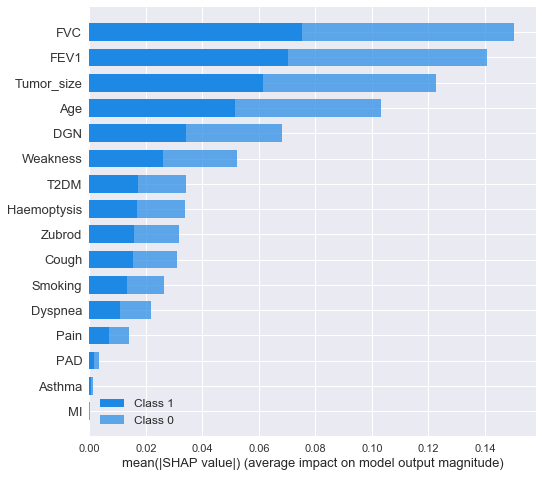

In [57]:
shap.summary_plot(shap_values, X_test)
#shap.summary_plot(shap_interaction_values, X1_sm_df)

#shap_values = explainer.shap_values(R1X_test.iloc[0:1000,:], nsamples=1000)
#shap.summary_plot(shap_values, R1X_test.iloc[0:1000,:])

In [105]:
# summarize the effects of all the features
#shap.summary_plot(shap_values, Xu)

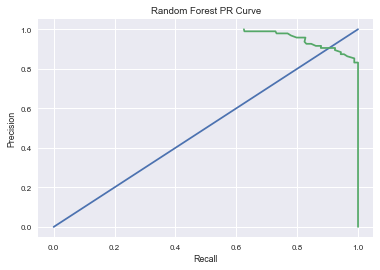

In [90]:
#this is a train-test-split after smote so I don't know how to value its accuracy.
#med, RX_test, ry_train, ry_test = train_test_split(Xu, y1_sm, random_state=29)
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(med, ry_train)

r1y_pred = rf1.predict_proba(RX_test)[:,1]
p, r, _ = precision_recall_curve(ry_test, r1y_pred)

plt.plot([0,1],[0,1])
plt.plot(p,r, label='Random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest PR Curve')
plt.show()

Basic Random Forest accuracy on training data: 1.0
Basic Random Forest accuracy on test data: 0.917
             precision    recall  f1-score   support

      False       0.89      0.95      0.92        98
       True       0.94      0.88      0.91        95

avg / total       0.92      0.92      0.92       193

[[93  5]
 [11 84]]
ROC score for tuned Random Forest model: 0.973


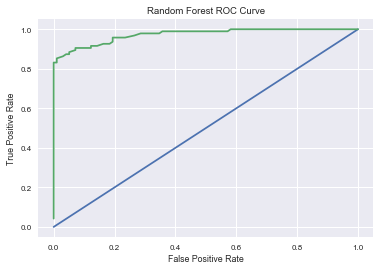

In [92]:
print('Basic Random Forest accuracy on training data:',round(rf1.score(R1X_train, r1y_train),3))
print('Basic Random Forest accuracy on test data:',round(rf1.score(R1X_test, r1y_test),3))
rf1_pred = rf1.predict(R1X_test)
print(classification_report(r1y_test,rf1_pred))
print(confusion_matrix(r1y_test, rf1_pred))

r1y_pred_prob = rf1.predict_proba(R1X_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(r1y_test, r1y_pred_prob),4))
fpr, tpr, thresholds = roc_curve(r1y_test, r1y_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

Basic Random Forest accuracy on training data: 1.0
Basic Random Forest accuracy on test data: 0.939
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       108
          1       0.20      0.17      0.18         6

avg / total       0.91      0.92      0.92       114

[[104   4]
 [  5   1]]
ROC score for tuned Random Forest model: 0.6335


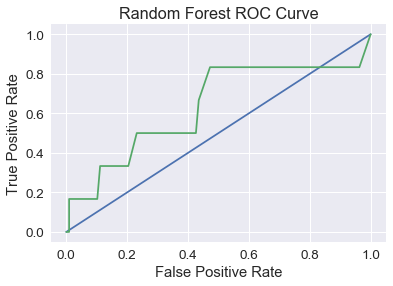

In [127]:
#with no upsampling or smote

rfn = RandomForestClassifier(n_estimators=100)
rfn.fit(X_train, y_train)
print('Basic Random Forest accuracy on training data:',round(rfn.score(X_train, y_train),3))
print('Basic Random Forest accuracy on test data:',round(rfn.score(X_test, y_test),3))
rfn_pred = rfn.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test, rf_pred))

ryn_pred_prob = rfn.predict_proba(X_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(y_test, ryn_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, ryn_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [194]:
from sklearn.model_selection import GridSearchCV

y_train_np = np.asarray(y_train)

rfg = RandomForestClassifier(class_weight='balanced')
rfg.fit(X_train, y_train_np)

param_grid = {'n_estimators' : [1,3,9,18,36,96,200], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
cv_rfg = GridSearchCV(estimator=rfg, param_grid=param_grid, cv=10)
cv_rfg.fit(X_train, y_train_np)
print(cv_rfg.best_params_)
print(cv_rfg.best_score_)
print(cv_rfg.best_estimator_)

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 36}
0.788235294117647
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=36, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Basic Random Forest accuracy on training data: 0.974
Basic Random Forest accuracy on test data: 0.904
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       108
          1       0.00      0.00      0.00         6

avg / total       0.90      0.90      0.90       114

[[103   5]
 [  6   0]]
ROC score for tuned Random Forest model: 0.5756


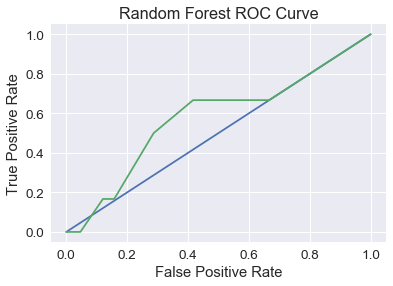

In [195]:
rfg_tuned = cv_rfg.best_estimator_
rfg_tuned.fit(X_train, y_train)

print('Basic Random Forest accuracy on training data:',round(rfg.score(X_train, y_train),3))
print('Basic Random Forest accuracy on test data:',round(rfg.score(X_test, y_test),3))
rfg_pred = rfg.predict(X_test)
print(classification_report(y_test,rfg_pred))
print(confusion_matrix(y_test, rfg_pred))

ryg_pred_prob = rfg.predict_proba(X_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(y_test, ryg_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, ryg_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

Basic Random Forest accuracy on training data: 1.0
Basic Random Forest accuracy on test data: 0.904
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       108
          1       0.00      0.00      0.00         6

avg / total       0.90      0.90      0.90       114

[[103   5]
 [  6   0]]
ROC score for tuned Random Forest model: 0.6497


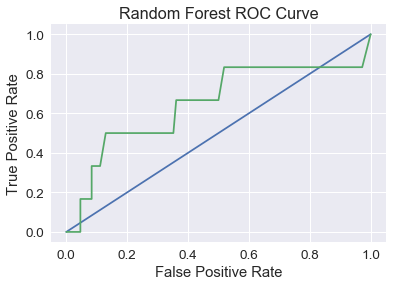

In [129]:
#with no upsampling or smote but paramgrid and cv

rfn = RandomForestClassifier(n_estimators=100)
rfn.fit(X_train, y_train)
print('Basic Random Forest accuracy on training data:',round(rfn.score(X_train, y_train),3))
print('Basic Random Forest accuracy on test data:',round(rfn.score(X_test, y_test),3))
rfn_pred = rfn.predict(X_test)
print(classification_report(y_test,rfn_pred))
print(confusion_matrix(y_test, rfn_pred))

ryn_pred_prob = rfn.predict_proba(X_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(y_test, ryn_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, ryn_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [245]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.35, random_state=29)

In [246]:
y_train_new.value_counts()

0    244
1     51
Name: Risk1Y, dtype: int64

In [247]:
y_test_new.value_counts()

0    141
1     18
Name: Risk1Y, dtype: int64

In [248]:
y_train_new = pd.DataFrame(y_train_new)
y_train_new.columns = ['Risk1Y']
train_df_new = pd.merge(X_train_new, y_train_new, how='outer', left_index=True, right_index=True, left_on=None, right_on=None )
train_df_new.columns

Index(['DGN', 'FVC', 'FEV1', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea',
       'Cough', 'Weakness', 'Tumor_size', 'T2DM', 'MI', 'PAD', 'Smoking',
       'Asthma', 'Age', 'Risk1Y'],
      dtype='object')

In [249]:
#60%train test split, which I keep adjusting even though it says 60% there <--

train_df_majority_new = train_df_new[train_df_new.Risk1Y==0]
train_df_minority_new = train_df_new[train_df_new.Risk1Y==1]

train_df_minority_upsampled_new = resample(train_df_minority_new,
                                             replace=True,
                                             n_samples=244,
                                             random_state=29)

train_upsampled_new = pd.concat([train_df_majority_new, train_df_minority_upsampled_new])


Xunew = train_upsampled_new.drop('Risk1Y', axis = 1)
yunew = train_upsampled_new.Risk1Y




In [250]:
yunew_np = np.asarray(yunew)

rfnewg = RandomForestClassifier(class_weight='balanced')
rfnewg.fit(Xunew, yunew_np)

param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
cv_rfnewg = GridSearchCV(estimator=rfnewg, param_grid=param_grid, cv=10)
cv_rfnewg.fit(Xunew, yunew_np)
print(cv_rfnewg.best_params_)
print(cv_rfnewg.best_score_)
print(cv_rfnewg.best_estimator_)

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 200}
0.9508196721311475
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Basic Random Forest accuracy on training data: 0.998
Basic Random Forest accuracy on test data: 0.836
             precision    recall  f1-score   support

          0       0.89      0.94      0.91       141
          1       0.10      0.06      0.07        18

avg / total       0.80      0.84      0.82       159

[[132   9]
 [ 17   1]]
ROC score for tuned Random Forest model: 0.6856


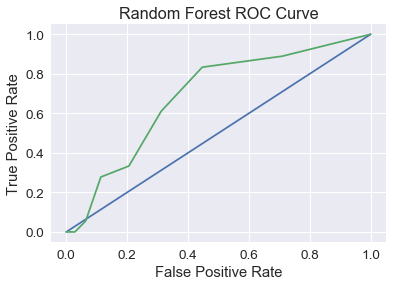

In [251]:
rfnewg_tuned = cv_rfnewg.best_estimator_
rfnewg_tuned.fit(Xunew, yunew)

print('Basic Random Forest accuracy on training data:',round(rfnewg.score(Xunew, yunew),3))
print('Basic Random Forest accuracy on test data:',round(rfnewg.score(X_test_new, y_test_new),3))
rfnewg_pred = rfnewg.predict(X_test_new)
print(classification_report(y_test_new,rfnewg_pred))
print(confusion_matrix(y_test_new, rfnewg_pred))

rynewg_pred_prob = rfnewg.predict_proba(X_test_new)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(y_test_new, rynewg_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, rynewg_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

Basic NN accuracy on training data: 0.486
Basic NN accuracy on test data: 0.78
             precision    recall  f1-score   support

          0       0.88      0.87      0.88       141
          1       0.05      0.06      0.05        18

avg / total       0.79      0.78      0.78       159

[[123  18]
 [ 17   1]]
ROC score for tuned NN model: 0.4326


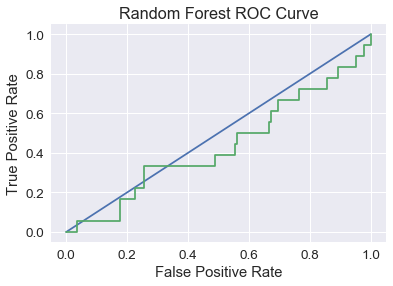

In [252]:
mlp = MLPClassifier()
mlp.fit(Xunew, yunew_np)


print('Basic NN accuracy on training data:',round(mlp.score(Xunew, yunew_np),3))
print('Basic NN accuracy on test data:',round(mlp.score(X_test_new, y_test_new),3))
mlp_pred = mlp.predict(X_test_new)
print(classification_report(y_test_new,mlp_pred))
print(confusion_matrix(y_test_new, mlp_pred))

mlp_pred_prob = mlp.predict_proba(X_test_new)[:,1]
print('ROC score for tuned NN model:', round(roc_auc_score(y_test_new, mlp_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, mlp_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

Basic MNB accuracy on training data: 0.615
Basic MNB accuracy on test data: 0.654
             precision    recall  f1-score   support

          0       0.90      0.69      0.78       141
          1       0.14      0.39      0.20        18

avg / total       0.81      0.65      0.71       159

[[97 44]
 [11  7]]
ROC score for tuned MNB model: 0.5508


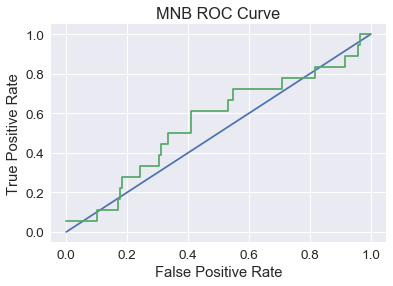

In [253]:
mnb = MultinomialNB()
mnb.fit(Xunew, yunew_np)


print('Basic MNB accuracy on training data:',round(mnb.score(Xunew, yunew_np),3))
print('Basic MNB accuracy on test data:',round(mnb.score(X_test_new, y_test_new),3))
mnb_pred = mnb.predict(X_test_new)
print(classification_report(y_test_new,mnb_pred))
print(confusion_matrix(y_test_new, mnb_pred))

mnb_pred_prob = mnb.predict_proba(X_test_new)[:,1]
print('ROC score for tuned MNB model:', round(roc_auc_score(y_test_new, mnb_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, mnb_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='MNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MNB ROC Curve')
plt.show()

Basic logr accuracy on training data: 0.682
Basic logr accuracy on test data: 0.654
             precision    recall  f1-score   support

          0       0.92      0.67      0.77       141
          1       0.18      0.56      0.27        18

avg / total       0.84      0.65      0.72       159

[[94 47]
 [ 8 10]]
ROC score for tuned logr model: 0.6379


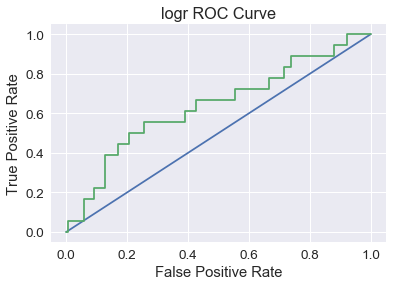

In [254]:
#logr = LogisticRegression()
logr = LogisticRegression(class_weight='balanced', C=100) #with the undersampling from class weight, it's better
logr.fit(Xunew, yunew_np)


print('Basic logr accuracy on training data:',round(logr.score(Xunew, yunew_np),3))
print('Basic logr accuracy on test data:',round(logr.score(X_test_new, y_test_new),3))
logr_pred = logr.predict(X_test_new)
print(classification_report(y_test_new,logr_pred))
print(confusion_matrix(y_test_new, logr_pred))

logr_pred_prob = logr.predict_proba(X_test_new)[:,1]
print('ROC score for tuned logr model:', round(roc_auc_score(y_test_new, logr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, logr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='logr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logr ROC Curve')
plt.show()

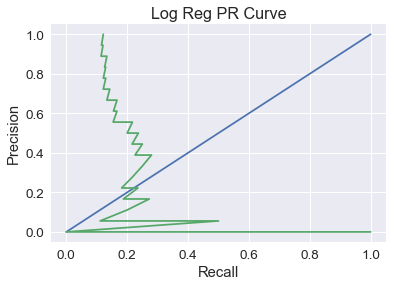

In [255]:
logr_pred_prob = logr.predict_proba(X_test_new)[:,1]
p, r, _ = precision_recall_curve(y_test_new, logr_pred_prob)

plt.plot([0,1],[0,1])
plt.plot(p,r, label='Log Reg')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Log Reg PR Curve')
plt.show()

In [256]:
#svc = SVC()
svc = SVC(class_weight='balanced', C=100) #with the undersampling from class weight, it's better
svc.fit(Xunew, yunew_np)


print('Basic svc accuracy on training data:',round(svc.score(Xunew, yunew_np),3))
print('Basic svc accuracy on test data:',round(svc.score(X_test_new, y_test_new),3))
svc_pred = svc.predict(X_test_new)
print(classification_report(y_test_new,svc_pred))
print(confusion_matrix(y_test_new, svc_pred))

svc_pred_prob = svc.predict_proba(X_test_new)[:,1]
print('ROC score for tuned svc model:', round(roc_auc_score(y_test_new, svc_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, svc_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='logr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('svc ROC Curve')
plt.show()

Basic svc accuracy on training data: 0.977
Basic svc accuracy on test data: 0.748
             precision    recall  f1-score   support

          0       0.89      0.82      0.85       141
          1       0.11      0.17      0.13        18

avg / total       0.80      0.75      0.77       159

[[116  25]
 [ 15   3]]


AttributeError: predict_proba is not available when  probability=False

In [257]:
#svc = SVC()
from sklearn.svm import LinearSVC

#lsvc = LinearSVC(class_weight='balanced') #predicts most to be dead regardless of actual
lsvc = LinearSVC() #quite variable results each run

lsvc.fit(Xunew, yunew_np)


print('Basic lsvc accuracy on training data:',round(lsvc.score(Xunew, yunew_np),3))
print('Basic lsvc accuracy on test data:',round(lsvc.score(X_test_new, y_test_new),3))
lsvc_pred = lsvc.predict(X_test_new)
print(classification_report(y_test_new,lsvc_pred))
print(confusion_matrix(y_test_new, lsvc_pred))

lsvc_pred_prob = lsvc.predict_proba(X_test_new)[:,1]
print('ROC score for tuned lsvc model:', round(roc_auc_score(y_test_new, lsvc_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, lsvc_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='lsvc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('lsvc ROC Curve')
plt.show()

Basic lsvc accuracy on training data: 0.529
Basic lsvc accuracy on test data: 0.151
             precision    recall  f1-score   support

          0       1.00      0.04      0.08       141
          1       0.12      1.00      0.21        18

avg / total       0.90      0.15      0.10       159

[[  6 135]
 [  0  18]]


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [258]:
logrshap = LogisticRegression(class_weight='balanced', C=100)
logrshap.fit(Xunew, yunew_np)

shap_values = shap.KernelExplainer(logrshap.predict_proba, Xunew).shap_values(X_test_new.iloc[0,:])
shap.force_plot(shap_values[0], X_test_new.iloc[0,:])

Using 488 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [279]:
#linear_lr = sklearn.linear_model.LogisticRegression()
#linear_lr.fit(X_train, Y_train)
#print_accuracy(linear_lr.predict)

# explain all the predictions in the test set
shap_values = shap.KernelExplainer(logrshap.predict_proba, Xunew).shap_values(X_test_new)
shap.force_plot(shap_values[0], X_test_new)

Using 488 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.

100%|██████████| 159/159 [1:35:57<00:00, 36.21s/it]


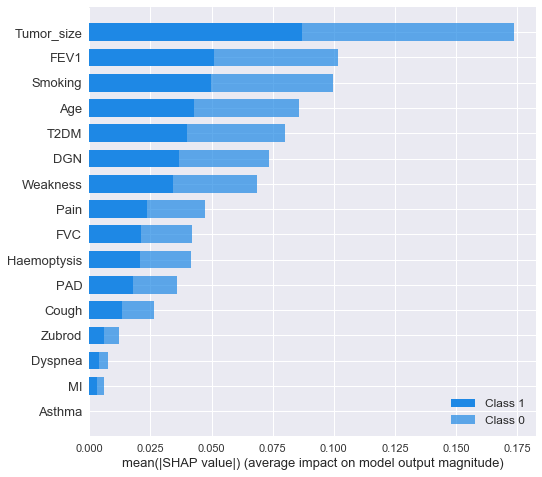

In [280]:
# summarize the effects of all the features
shap.summary_plot(shap_values, Xunew)

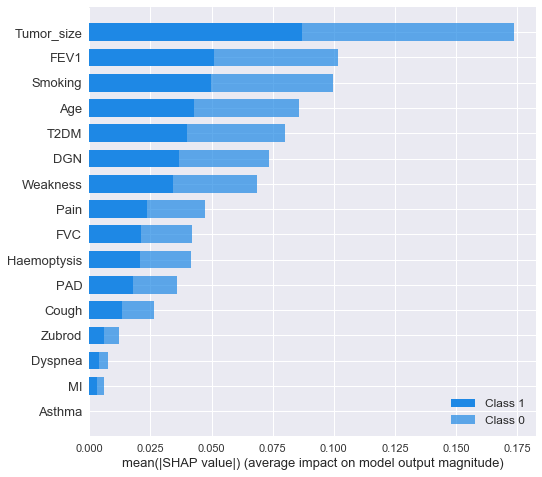

In [281]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test_new)

Basic alr accuracy on training data: 0.629
Basic alr accuracy on test data: 0.566
             precision    recall  f1-score   support

          0       0.91      0.57      0.70       141
          1       0.14      0.56      0.22        18

avg / total       0.82      0.57      0.65       159

[[80 61]
 [ 8 10]]
ROC score for tuned alr model: 0.5548


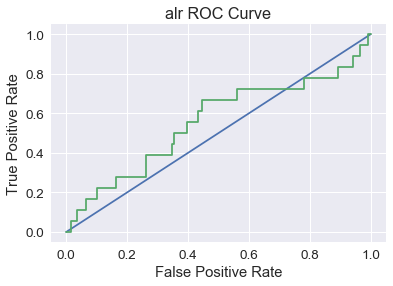

In [259]:
alr = AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced'))

alr.fit(Xunew, yunew_np)


print('Basic alr accuracy on training data:',round(alr.score(Xunew, yunew_np),3))
print('Basic alr accuracy on test data:',round(alr.score(X_test_new, y_test_new),3))
alr_pred = alr.predict(X_test_new)
print(classification_report(y_test_new,alr_pred))
print(confusion_matrix(y_test_new, alr_pred))

alr_pred_prob = alr.predict_proba(X_test_new)[:,1]
print('ROC score for tuned alr model:', round(roc_auc_score(y_test_new, alr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, alr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='alr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('alr ROC Curve')
plt.show()

In [229]:
'''
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(Xunew, yunew_np)


print('Basic rfr accuracy on training data:',round(rfr.score(Xunew, yunew_np),3))
print('Basic rfr accuracy on test data:',round(rfr.score(X_test_new, y_test_new),3))
rfr_pred = rfr.predict(X_test_new)
print(classification_report(y_test_new,rfr_pred))
print(confusion_matrix(y_test_new, rfr_pred))

rfr_pred_prob = rfr.predict_proba(X_test_new)[:,1]
print('ROC score for tuned rfr model:', round(roc_auc_score(y_test_new, rfr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, rfr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='rfr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfr ROC Curve')
plt.show()'''

"\nfrom sklearn.ensemble import RandomForestRegressor\nrfr = RandomForestRegressor(n_estimators=100)\n\nrfr.fit(Xunew, yunew_np)\n\n\nprint('Basic rfr accuracy on training data:',round(rfr.score(Xunew, yunew_np),3))\nprint('Basic rfr accuracy on test data:',round(rfr.score(X_test_new, y_test_new),3))\nrfr_pred = rfr.predict(X_test_new)\nprint(classification_report(y_test_new,rfr_pred))\nprint(confusion_matrix(y_test_new, rfr_pred))\n\nrfr_pred_prob = rfr.predict_proba(X_test_new)[:,1]\nprint('ROC score for tuned rfr model:', round(roc_auc_score(y_test_new, rfr_pred_prob),4))\nfpr, tpr, thresholds = roc_curve(y_test_new, rfr_pred_prob)\nplt.plot([0,1],[0,1])\nplt.plot(fpr,tpr, label='rfr')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('rfr ROC Curve')\nplt.show()"

Basic bclr accuracy on training data: 0.639
Basic bclr accuracy on test data: 0.635
             precision    recall  f1-score   support

          0       0.93      0.64      0.76       141
          1       0.18      0.61      0.27        18

avg / total       0.84      0.64      0.70       159

[[90 51]
 [ 7 11]]
ROC score for tuned bclr model: 0.6036


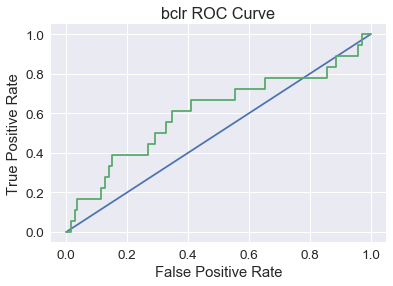

In [260]:
from sklearn.ensemble import BaggingClassifier

bclr = BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'), n_estimators=100)

bclr.fit(Xunew, yunew_np)


print('Basic bclr accuracy on training data:',round(bclr.score(Xunew, yunew_np),3))
print('Basic bclr accuracy on test data:',round(bclr.score(X_test_new, y_test_new),3))
bclr_pred = bclr.predict(X_test_new)
print(classification_report(y_test_new,bclr_pred))
print(confusion_matrix(y_test_new, bclr_pred))

bclr_pred_prob = bclr.predict_proba(X_test_new)[:,1]
print('ROC score for tuned bclr model:', round(roc_auc_score(y_test_new, bclr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, bclr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='bclr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('bclr ROC Curve')
plt.show()

Basic arf accuracy on training data: 1.0
Basic arf accuracy on test data: 0.843
             precision    recall  f1-score   support

          0       0.89      0.94      0.91       141
          1       0.11      0.06      0.07        18

avg / total       0.80      0.84      0.82       159

[[133   8]
 [ 17   1]]
ROC score for tuned arf model: 0.63


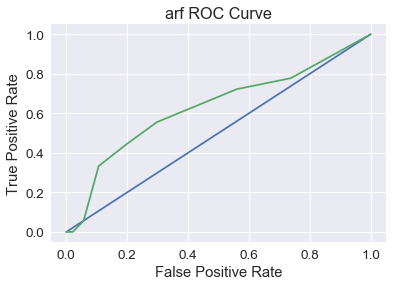

In [261]:
arf = AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced'), n_estimators=100)

arf.fit(Xunew, yunew_np)


print('Basic arf accuracy on training data:',round(arf.score(Xunew, yunew_np),3))
print('Basic arf accuracy on test data:',round(arf.score(X_test_new, y_test_new),3))
arf_pred = arf.predict(X_test_new)
print(classification_report(y_test_new,arf_pred))
print(confusion_matrix(y_test_new, arf_pred))

arf_pred_prob = arf.predict_proba(X_test_new)[:,1]
print('ROC score for tuned arf model:', round(roc_auc_score(y_test_new, arf_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, arf_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='arf')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('arf ROC Curve')
plt.show()

Accuracy on training data: 1.0
Accuracy on test data: 0.851
             precision    recall  f1-score   support

          0       0.96      0.88      0.92       108
          1       0.13      0.33      0.19         6

avg / total       0.92      0.85      0.88       114

[[95 13]
 [ 4  2]]
ROC score for xgblr model: 0.6744


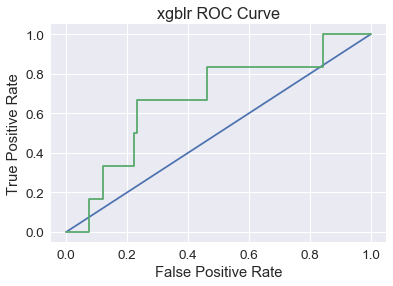

In [262]:
#xgb1=XGBClassifier()
#xgb1.fit(Xunew, yunew)


params  = {'objective': 'binary:logistic','num_class': 2} 


#xgblr = xgboost.DMatrix(Xunew, label=yunew)
#xglr = xgblr.train(params=params, dtrain=xgboost.DMatrix(Xunew, yunew), num_boost_round=100)                    
#xglr.predict(xgb1.DMatrix(X_test.values)) 


xgblr = XGBClassifier(max_depth=20, params=params)
xgblr.fit(Xunew, yunew)
xgblr_pred = xgblr.predict(X_test)
predictionsxx = [round(value) for value in xgblr_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgblr.score(Xunew, yunew),3))
print('Accuracy on test data:',round(xgblr.score(X_test, y_test),3))
print(classification_report(y_test,xgblr_pred))
print(confusion_matrix(y_test,xgblr_pred))

xgblr_pred_prob = xgblr.predict_proba(X_test)[:,1]
print('ROC score for xgblr model:', round(roc_auc_score(y_test, xgblr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, xgblr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='xgblr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('xgblr ROC Curve')
plt.show()

Basic logrlr accuracy on training data: 0.682
Basic logrlr accuracy on test data: 0.654
             precision    recall  f1-score   support

          0       0.92      0.67      0.77       141
          1       0.18      0.56      0.27        18

avg / total       0.84      0.65      0.72       159

[[94 47]
 [ 8 10]]
ROC score for tuned logr model: 0.6379


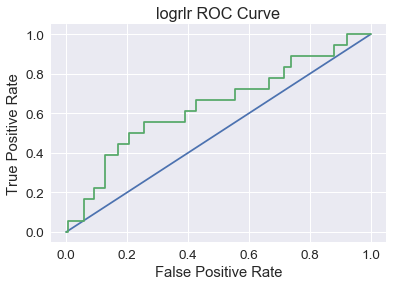

In [263]:
#logr = LogisticRegression() with L1 penalty
logrlr = LogisticRegression(class_weight='balanced', C=100, solver='liblinear') #with the undersampling from class weight, it's better
logrlr.fit(Xunew, yunew_np)


print('Basic logrlr accuracy on training data:',round(logrlr.score(Xunew, yunew_np),3))
print('Basic logrlr accuracy on test data:',round(logrlr.score(X_test_new, y_test_new),3))
logrlr_pred = logrlr.predict(X_test_new)
print(classification_report(y_test_new,logrlr_pred))
print(confusion_matrix(y_test_new, logrlr_pred))

logrlr_pred_prob = logrlr.predict_proba(X_test_new)[:,1]
print('ROC score for tuned logr model:', round(roc_auc_score(y_test_new, logrlr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test_new, logrlr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='logrlr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logrlr ROC Curve')
plt.show()

In [271]:
train_df_skim = train_df_new.drop(['DGN', 'FVC', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 'Weakness', 
                                   'T2DM', 'MI', 'PAD', 'Asthma'], axis=1)
X_test_skim = X_test.drop(['DGN', 'FVC', 'Zubrod', 'Pain', 'Haemoptysis', 'Dyspnea', 'Cough', 'Weakness', 
                                   'T2DM', 'MI', 'PAD', 'Asthma'], axis=1)
#keep 'Tumor_size', 'Smoking', 'FEV1', 'Age', 'Risk1Y'


In [274]:
train_df_majority_skim = train_df_skim[train_df_skim.Risk1Y==0]
train_df_minority_skim = train_df_skim[train_df_skim.Risk1Y==1]

train_df_minority_upsampled_skim = resample(train_df_minority_skim,
                                             replace=True,
                                             n_samples=244,
                                             random_state=29)

train_upsampled_skim = pd.concat([train_df_majority_skim, train_df_minority_upsampled_skim])


Xuskim = train_upsampled_skim.drop('Risk1Y', axis = 1)
yuskim = train_upsampled_skim.Risk1Y
print(Xuskim.columns)
print(X_test_skim.columns)

Index(['FEV1', 'Tumor_size', 'Smoking', 'Age'], dtype='object')
Index(['FEV1', 'Tumor_size', 'Smoking', 'Age'], dtype='object')


In [266]:
yuskim.value_counts()

1    244
0    244
Name: Risk1Y, dtype: int64

In [267]:
y_test.value_counts()

0    108
1      6
Name: Risk1Y, dtype: int64

Basic logrlrsk accuracy on training data: 0.666
Basic logrlrsk accuracy on test data: 0.649
             precision    recall  f1-score   support

          0       0.97      0.65      0.78       108
          1       0.10      0.67      0.17         6

avg / total       0.93      0.65      0.75       114

[[70 38]
 [ 2  4]]
ROC score for tuned logrlrsk model: 0.6991


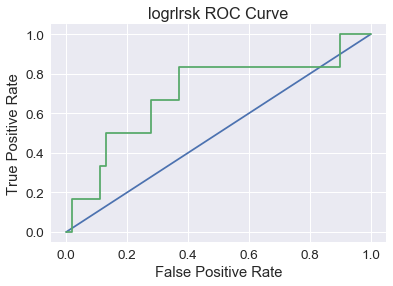

In [276]:
logrlrsk = LogisticRegression(class_weight='balanced', C=100, solver='liblinear') #with the undersampling from class weight, it's better
logrlrsk.fit(Xuskim, yuskim)


print('Basic logrlrsk accuracy on training data:',round(logrlrsk.score(Xuskim, yuskim),3))
print('Basic logrlrsk accuracy on test data:',round(logrlrsk.score(X_test_skim, y_test),3))
logrlrsk_pred = logrlrsk.predict(X_test_skim)
print(classification_report(y_test,logrlrsk_pred))
print(confusion_matrix(y_test, logrlrsk_pred))

logrlrsk_pred_prob = logrlrsk.predict_proba(X_test_skim)[:,1]
print('ROC score for tuned logrlrsk model:', round(roc_auc_score(y_test, logrlrsk_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, logrlrsk_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='logrlrsk')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logrlrsk ROC Curve')
plt.show()

Basic alrsk accuracy on training data: 0.607
Basic alrsk accuracy on test data: 0.544
             precision    recall  f1-score   support

          0       0.95      0.55      0.69       108
          1       0.06      0.50      0.10         6

avg / total       0.90      0.54      0.66       114

[[59 49]
 [ 3  3]]
ROC score for tuned alrsk model: 0.6235


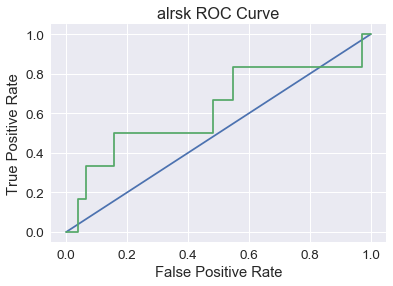

In [278]:
alrsk = AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced'))

alrsk.fit(Xuskim, yuskim)




print('Basic alrsk accuracy on training data:',round(alrsk.score(Xuskim, yuskim),3))
print('Basic alrsk accuracy on test data:',round(alrsk.score(X_test_skim, y_test),3))
alrsk_pred = alrsk.predict(X_test_skim)
print(classification_report(y_test,alrsk_pred))
print(confusion_matrix(y_test, alrsk_pred))

alrsk_pred_prob = alrsk.predict_proba(X_test_skim)[:,1]
print('ROC score for tuned alrsk model:', round(roc_auc_score(y_test, alrsk_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, alrsk_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='alrsk')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('alrsk ROC Curve')
plt.show()

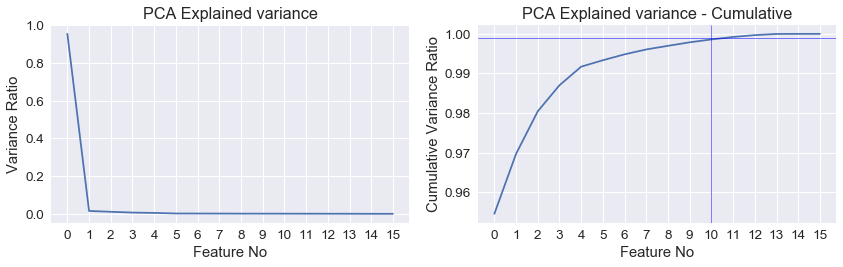

In [290]:
#https://bibinmjose.github.io/Enron_find_fraud/ with my data put in
#from here it looks like 97% of variance from 2 features, 
#over 99% of variance comes from 4 features, and 99.9% from 10 features.

from sklearn.decomposition import PCA
pca =PCA()
pca.fit(Xu,yu)

fig=plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xticks(np.arange(16))
plt.xlabel('Feature No')
plt.ylabel('Variance Ratio')
plt.title('PCA Explained variance')
plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(16))
plt.axhline(y=.999,color='b',linewidth=.5)
plt.axvline(x=10,color='b',linewidth=.5)
plt.xlabel('Feature No')
plt.ylabel('Cumulative Variance Ratio')
plt.title('PCA Explained variance - Cumulative')
plt.tight_layout()
plt.show()

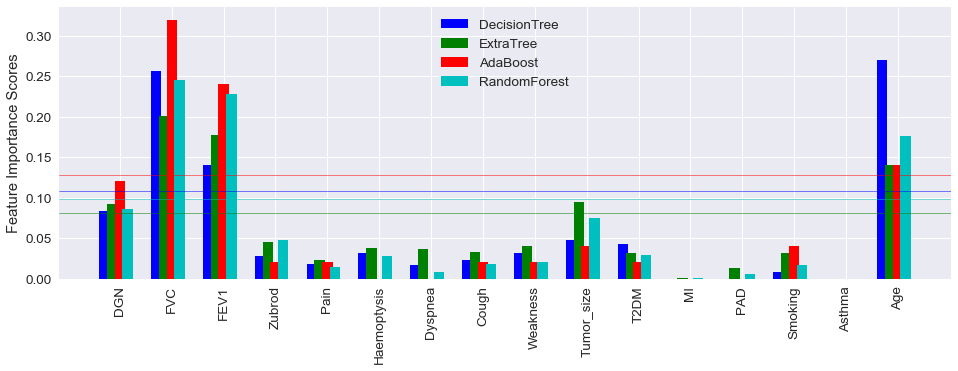

In [292]:
# also from https://bibinmjose.github.io/Enron_find_fraud/ 

from sklearn.tree import DecisionTreeClassifier

classifiers = [("DecisionTree",DecisionTreeClassifier(class_weight='balanced')),\
               ("ExtraTree",ExtraTreesClassifier(class_weight='balanced')),\
               ("AdaBoost",AdaBoostClassifier()),\
               ("RandomForest",RandomForestClassifier(class_weight='balanced'))]
COLORS = 'bgrcmyk'

width_bar =0.2
fig=plt.figure(figsize=(16,5))
for i, (name, clf) in enumerate(classifiers):
    clf.fit(Xu,yu)
    imp = clf.feature_importances_
    plt.bar(np.arange(16)+(0.75*width_bar)*(i),imp, \
            width=width_bar,color=COLORS[i], label = name)
    plt.axhline(y=0.4*np.amax(imp),color=COLORS[i],linewidth=0.5)
plt.xticks(np.arange(16)+0.3,Xu[1:],rotation="vertical")
plt.legend()
plt.ylabel("Feature Importance Scores")
plt.show()

[ 3.    2.96  2.2  12.    0.   63.  ]
(554, 6)
Basic milogr accuracy on training data: 0.655
Basic milogr accuracy on test data: 0.193
             precision    recall  f1-score   support

          0       1.00      0.15      0.26       108
          1       0.06      1.00      0.12         6

avg / total       0.95      0.19      0.25       114

[[16 92]
 [ 0  6]]
ROC score for tuned milogr model: 0.7153


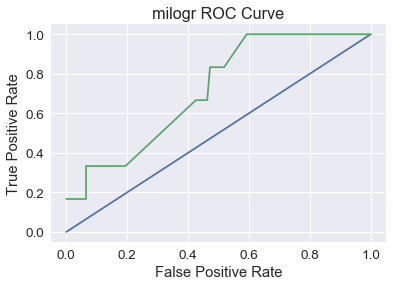

In [294]:
from sklearn.feature_selection import (SelectFromModel, VarianceThreshold, SelectKBest, chi2, mutual_info_classif)
from sklearn.pipeline import Pipeline

X_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(Xu, yu)
X_mitest = SelectKBest(mutual_info_classif, k=6).fit_transform(X_test, y_test)
#v.fit_transform(X_v)

milogr = LogisticRegression(class_weight='balanced', C=10)
milogr.fit(X_mi, yu)

print(X_mi[0]) 
print(X_mi.shape)

print('Basic milogr accuracy on training data:',round(milogr.score(X_mi, yu),3))
print('Basic milogr accuracy on test data:',round(milogr.score(X_mitest, y_test),3))
milogr_pred = milogr.predict(X_mitest)
print(classification_report(y_test,milogr_pred))
print(confusion_matrix(y_test, milogr_pred))

milogr_pred_prob = milogr.predict_proba(X_mitest)[:,1]
print('ROC score for tuned milogr model:', round(roc_auc_score(y_test, milogr_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, milogr_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='milogr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('milogr ROC Curve')
plt.show()

[[ 0.41542617 -0.01797322 -0.42277294  0.22025083  0.93201482  0.21677097
   0.85512136  0.22183314  0.42462441  0.52308035  1.11663843 -1.27397602
   0.3988079   0.68630544  0.         -0.01364557]]


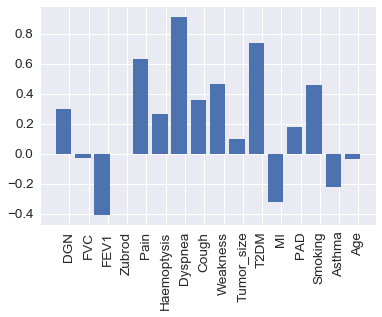

In [296]:
x = np.arange(16)
mco = LogisticRegression(class_weight='balanced', C=10)
mco.fit(Xu, yu)
#mco.fit(X / np.std(X, 0), y)

print(mco.coef_[0:1])

#coef seems unreshapable or unflattenable
#y_bars = np.asmatrix(mco.coef_[0:1])

y_bars = [0.2950283, -0.03116008, -0.40667439, -0.00444462, 0.63136491, 0.26644198, 0.9101634, 0.36049934,
                     0.460505, 0.09540407, 0.73589334, -0.32305031, 0.17496868, 0.45840808, -0.22344185, -0.03695627]

plt.bar(x, y_bars)
plt.xticks(np.arange(16)+0.3,Xu[1:],rotation="vertical")
plt.show()